In [1]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import os
import pickle
import joblib

import warnings 
# warnings.filterwarnings("ignore")

from datetime import datetime, date, time

from tensorflow import keras
from tensorflow.keras import layers

from rich.progress import track

from termcolor import colored

from sklearn.linear_model import LinearRegression

from pandas.plotting import scatter_matrix

print(tf.__version__)

import time
ost = time.time()

ost = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
print(ost)

ost = time.strftime("%H:%M:%S", time.gmtime())
print(ost)

2023-05-13 17:52:18.279383: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-13 17:52:19.367251: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-13 17:52:19.390005: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-13 17:52:19.390039: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

2.10.0
2023-05-13 17:52:32
17:52:32


In [2]:
metric_file_name = 'metric_train_by_none.log'

In [3]:
df = pd.read_csv(metric_file_name, sep=',', header=0)

In [4]:
df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.170,20:07:33,20:07:3,170.48660,122.845000,1,0.4,9.8,69.9,15.9,...,54914.0,727424.8,0.0,42991.2,100.0,182.8,182.8,182.9,182.3,182.4
1,192.168.0.170,20:07:42,20:07:4,173.23785,100.906500,3,1.0,9.5,69.5,15.5,...,47587.6,725717.6,0.0,37337.2,100.0,131.1,131.1,131.0,131.1,131.1
2,192.168.0.170,20:07:51,20:07:5,76.25155,69.350800,1,1.0,9.7,76.1,15.7,...,42023.2,724221.6,0.0,34854.0,100.0,235.0,235.0,235.0,235.0,235.1
3,192.168.0.170,20:08:01,20:08:0,169.67600,103.225818,1,1.1,8.6,79.8,14.4,...,38244.0,723113.6,0.0,28973.2,100.0,264.9,264.9,284.9,264.9,285.0
4,192.168.0.170,20:08:11,20:08:1,95.18005,72.214400,1,1.0,9.5,82.2,16.3,...,39842.8,724387.2,0.0,28122.8,100.0,259.4,259.4,260.1,259.4,260.2


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
response_time_p95,224.0,370.353299,724.126108,67.528050,84.439000,94.528150,145.046737,2800.500400
response_time,224.0,208.113452,436.441158,53.919527,70.298126,73.024617,87.004650,2415.910126
worker_number,224.0,4.941964,2.743313,1.000000,3.000000,5.000000,7.000000,9.000000
request_rate,224.0,15.723661,12.297403,0.100000,4.900000,13.750000,24.350000,40.100000
CPU0User%,224.0,22.253571,16.233290,5.100000,9.600000,14.850000,34.850000,57.800000
CPU0Idle%,224.0,50.551339,24.092075,0.100000,33.975000,59.300000,67.125000,86.300000
CPU0Total%,224.0,39.916964,29.724984,9.000000,16.175000,26.500000,63.775000,99.900000
[DSK:sda]Reads,224.0,107.448661,87.695564,3.800000,36.850000,65.500000,212.000000,307.100000
[DSK:sda]RMerge,224.0,81.942411,75.448909,0.000000,13.775000,53.350000,158.875000,238.800000
[DSK:sda]RKBytes,224.0,3428.738393,2950.415061,146.800000,1072.650000,1974.700000,6720.025000,10954.500000


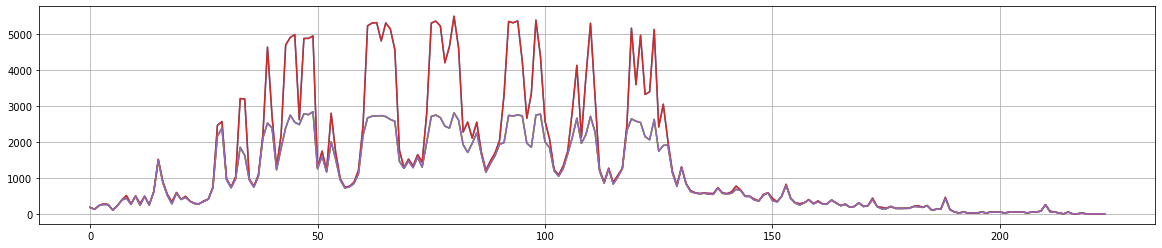

In [6]:
plt.figure(figsize=(20,4))
plt.plot(df['[TCPD]OutRequests'])
plt.plot(df['[TCPD]InDelivers'])
plt.plot(df['[TCPD]InReceives'])
plt.plot(df['[TCPD]OutSegs'])
plt.plot(df['[TCPD]InSegs'])
plt.grid()
plt.show()

In [7]:
df['worker_give_metrics'].unique()

array(['192.168.0.170'], dtype=object)

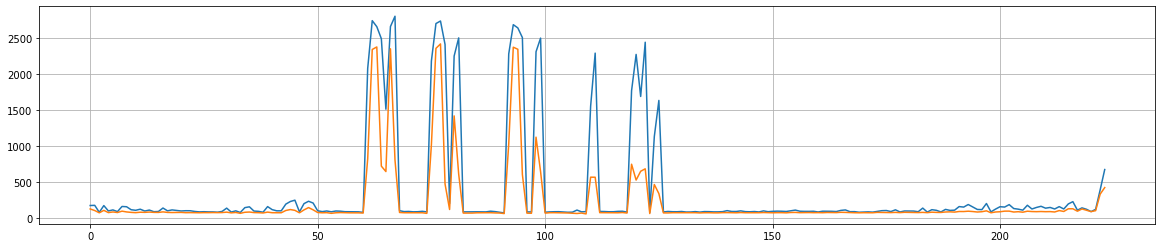

In [8]:
plt.figure(figsize=(20,4))
plt.plot(df['response_time_p95'])
plt.plot(df['response_time'])
plt.grid()
# plt.grid(axis='y')
plt.show()

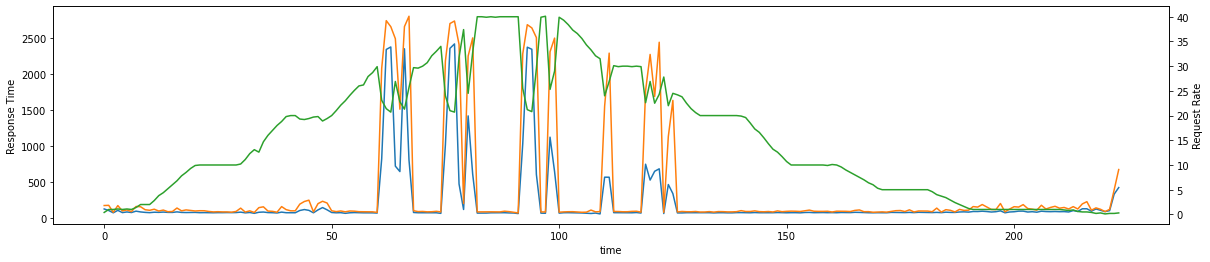

In [9]:

fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df['response_time'], label = 'RT', color = 'C0')
ax1.plot(df['response_time_p95'], label = 'RT95%', color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], label = 'RR', color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

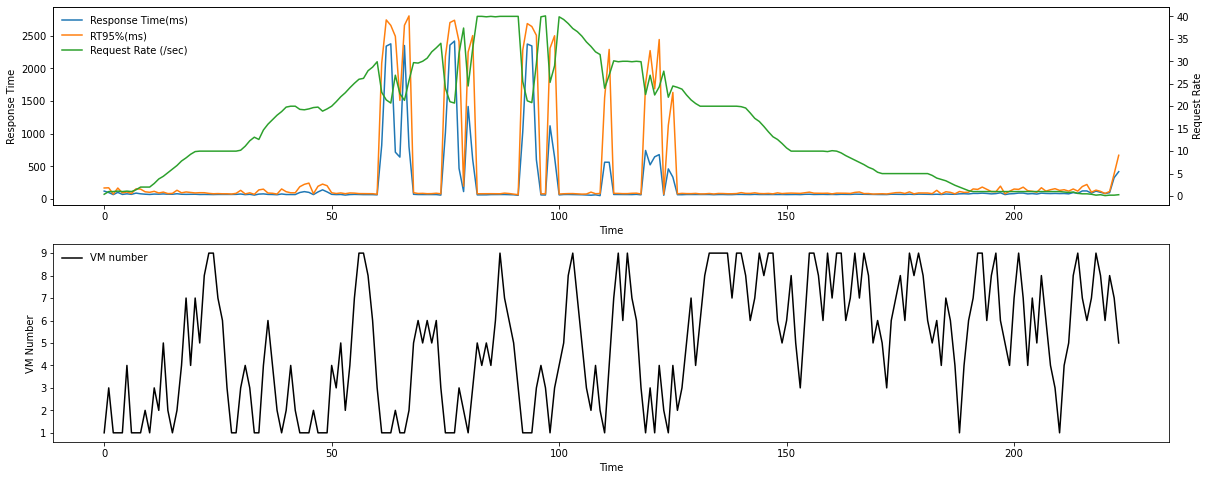

In [10]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

l1 = ax1.plot(df['response_time'], color = 'C0', label='Response Time(ms)')
l2 = ax1.plot(df['response_time_p95'], color = 'C1', label='RT95%(ms)')

ax2 = ax1.twinx()

l3 = ax2.plot(df['request_rate'], color = 'C2', label='Request Rate (/sec)')

ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

ax3.plot(df['worker_number'], color = 'black', label='VM number')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')
ax3.legend(loc=2, frameon=False)

lns = l1+l2+l3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=2, frameon=False)

plt.show()

In [11]:
df.iloc[:, 0:7].describe()

,response_time_p95,response_time,worker_number,request_rate
count,224.000000,224.000000,224.000000,224.000000
mean,370.353299,208.113452,4.941964,15.723661
std,724.126108,436.441158,2.743313,12.297403
min,67.528050,53.919527,1.000000,0.100000
25%,84.439000,70.298126,3.000000,4.900000
50%,94.528150,73.024617,5.000000,13.750000
75%,145.046737,87.004650,7.000000,24.350000
max,2800.500400,2415.910126,9.000000,40.100000


In [12]:
df.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', '[DSK:sda]Reads', '[DSK:sda]RMerge',
       '[DSK:sda]RKBytes', '[DSK:sda]WaitR', '[DSK:sda]Writes',
       '[DSK:sda]WMerge', '[DSK:sda]WKBytes', '[DSK:sda]WaitW',
       '[DSK:sda]Request', '[DSK:sda]QueLen', '[DSK:sda]Wait',
       '[DSK:sda]SvcTim', '[DSK:sda]Util', '[NUMA:0]Used', '[NUMA:0]Free',
       '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[NUMA:0]AnonH',
       '[NUMA:0]Inactive', '[NUMA:0]Hits', '[TCPD]InReceives',
       '[TCPD]InDelivers', '[TCPD]OutRequests', '[TCPD]InSegs',
       '[TCPD]OutSegs'],
      dtype='object')

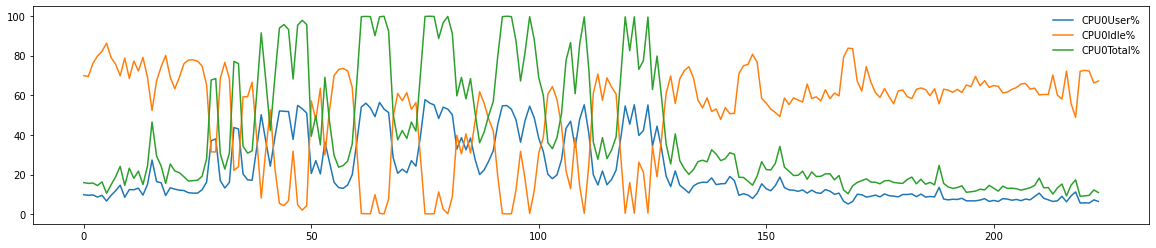

In [13]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'CPU' in col_name:
        plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [14]:
df.iloc[:, 7:10].describe()

,CPU0User%,CPU0Idle%,CPU0Total%
count,224.000000,224.000000,224.000000
mean,22.253571,50.551339,39.916964
std,16.233290,24.092075,29.724984
min,5.100000,0.100000,9.000000
25%,9.600000,33.975000,16.175000
50%,14.850000,59.300000,26.500000
75%,34.850000,67.125000,63.775000
max,57.800000,86.300000,99.900000


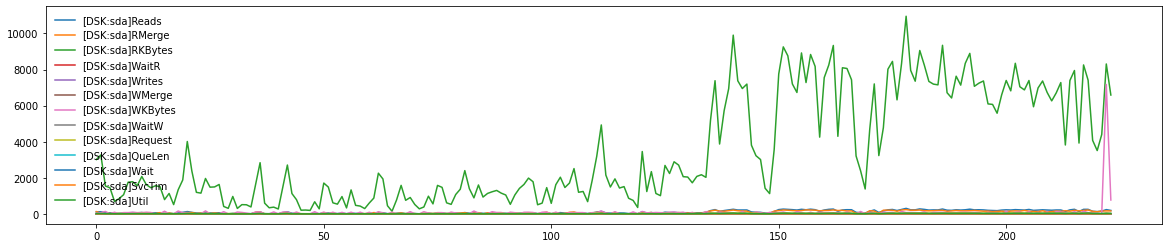

In [15]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'DSK' in col_name:
        if df[col_name].describe()[2] > 0:
            plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [16]:
df.iloc[:, 10:23].describe()

,[DSK:sda]Reads,[DSK:sda]RMerge,[DSK:sda]RKBytes,[DSK:sda]WaitR,[DSK:sda]Writes,[DSK:sda]WMerge,[DSK:sda]WKBytes,[DSK:sda]WaitW,[DSK:sda]Request,[DSK:sda]QueLen,[DSK:sda]Wait,[DSK:sda]SvcTim,[DSK:sda]Util
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.00000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,107.448661,81.942411,3428.738393,1.181250,11.944196,2.025893,94.38750,0.803125,21.215625,0.042857,1.560714,1.599107,17.462500
std,87.695564,75.448909,2950.415061,0.578545,10.057648,0.681497,479.54798,0.334073,11.616000,0.061687,0.463726,0.488155,12.864479
min,3.800000,0.000000,146.800000,0.200000,0.200000,0.500000,3.20000,0.400000,5.700000,0.000000,0.500000,0.400000,1.100000
25%,36.850000,13.775000,1072.650000,0.600000,0.400000,1.500000,8.40000,0.600000,11.000000,0.000000,1.200000,1.300000,6.575000
50%,65.500000,53.350000,1974.700000,1.100000,14.550000,2.100000,70.65000,0.800000,18.500000,0.000000,1.600000,1.600000,11.600000
75%,212.000000,158.875000,6720.025000,1.700000,19.400000,2.600000,92.95000,0.900000,31.150000,0.100000,1.900000,1.900000,32.400000
max,307.100000,238.800000,10954.500000,2.500000,40.700000,3.900000,7172.80000,3.400000,50.400000,0.200000,2.800000,3.600000,47.000000


In [17]:
df.iloc[:, 23:31].describe()

,[NUMA:0]Used,[NUMA:0]Free,[NUMA:0]Slab,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.0,224.000000,224.0
mean,930282.435714,74429.564286,88173.267857,37808.751786,743808.203571,0.0,31005.332143,100.0
std,7169.697052,7169.697052,973.428050,5461.416017,12665.790151,0.0,4313.345708,0.0
min,906185.200000,63453.200000,86218.400000,27806.000000,722512.000000,0.0,21418.000000,100.0
25%,927412.000000,69324.500000,87228.500000,33527.900000,730075.100000,0.0,27737.700000,100.0
50%,931523.600000,73188.400000,88444.000000,36541.200000,747827.000000,0.0,30769.200000,100.0
75%,935387.500000,77300.000000,88775.100000,40975.600000,755090.800000,0.0,34270.100000,100.0
max,941258.800000,98526.800000,90460.400000,54914.000000,758834.800000,0.0,42991.200000,100.0


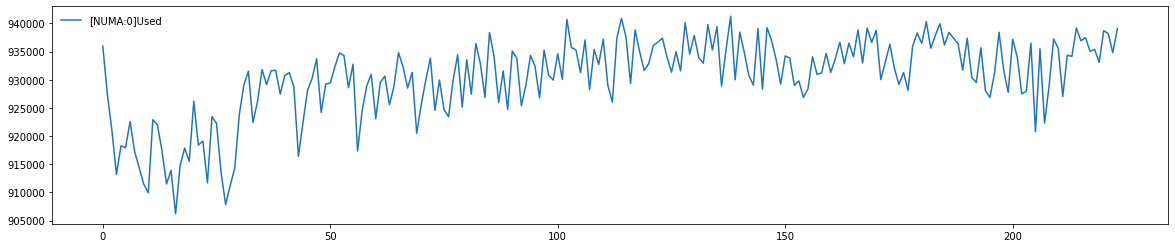

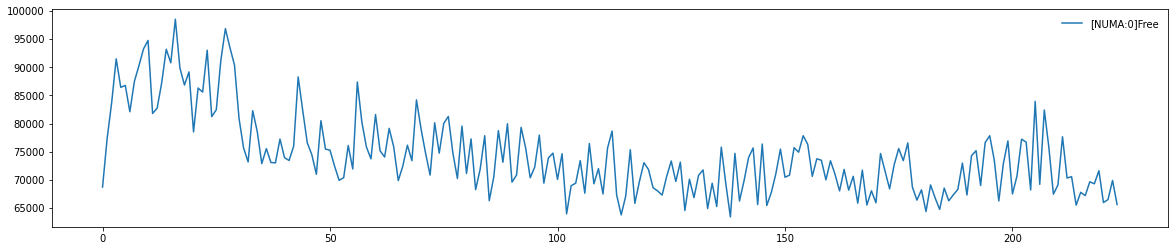

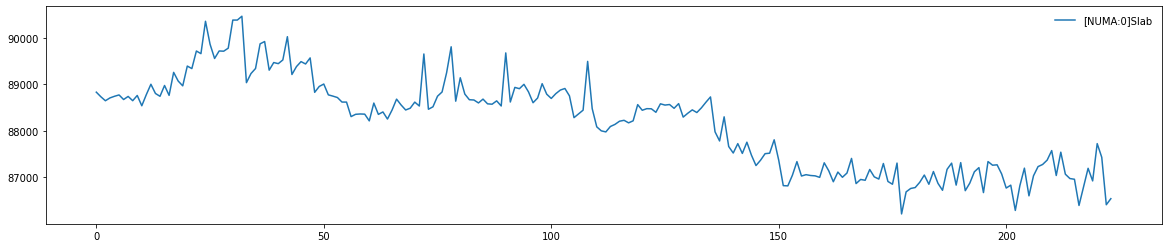

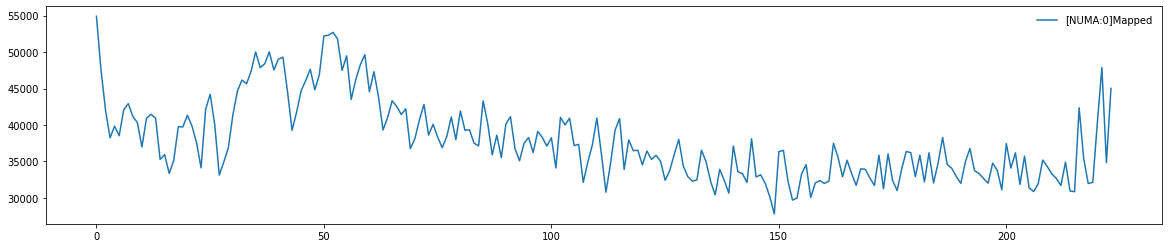

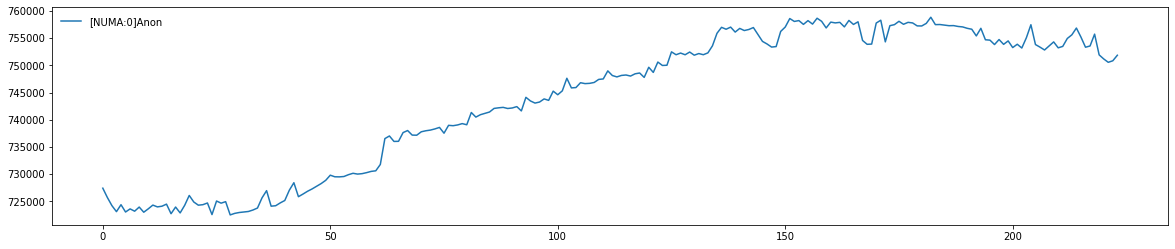

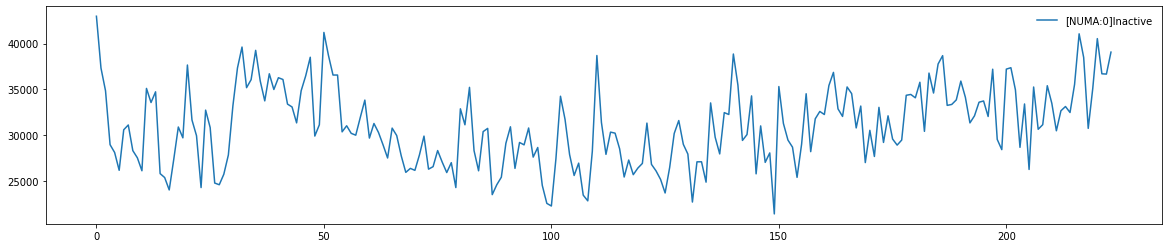

In [18]:
for col_name in df.columns:
    if 'NUMA' in col_name:
        if df[col_name].describe()[2] > 0:
            plt.figure(figsize=(20, 4))
            plt.ticklabel_format(useOffset=False)
            plt.ticklabel_format(style='plain')
            plt.plot(df[col_name], label = col_name)
            plt.legend(frameon=False)
            plt.show()

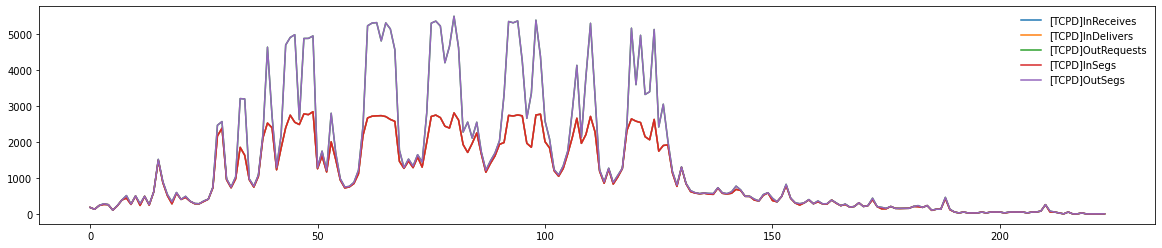

In [19]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'TCP' in col_name:
        if df[col_name].describe()[2] > 0:
            plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

## CPU Threshod és Response Time Threshold

Két féle skálázást csináltam azonos terheléssel.

A két féle skálázásból származó log filokat beolvasom és összehasonlítom.

In [22]:
# -----------------------------------------------

# New, jó ezt használom

mf = df.copy()

mf['actual_vm_number_is'] = mf['worker_number']
mf['actual_vm_number_was'] = mf['worker_number'].shift(1)
mf['actual_vm_number_will'] = mf['worker_number'].shift(-1)

mf['delta_vm'] = mf['actual_vm_number_will'] - mf['actual_vm_number_is']

mf.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,actual_vm_number_is,actual_vm_number_was,actual_vm_number_will,delta_vm
0,192.168.0.170,20:07:33,20:07:3,170.48660,122.845000,1,0.4,9.8,69.9,15.9,...,100.0,182.8,182.8,182.9,182.3,182.4,1,NaN,3.0,2.0
1,192.168.0.170,20:07:42,20:07:4,173.23785,100.906500,3,1.0,9.5,69.5,15.5,...,100.0,131.1,131.1,131.0,131.1,131.1,3,1.0,1.0,-2.0
2,192.168.0.170,20:07:51,20:07:5,76.25155,69.350800,1,1.0,9.7,76.1,15.7,...,100.0,235.0,235.0,235.0,235.0,235.1,1,3.0,1.0,0.0
3,192.168.0.170,20:08:01,20:08:0,169.67600,103.225818,1,1.1,8.6,79.8,14.4,...,100.0,264.9,264.9,284.9,264.9,285.0,1,1.0,1.0,0.0
4,192.168.0.170,20:08:11,20:08:1,95.18005,72.214400,1,1.0,9.5,82.2,16.3,...,100.0,259.4,259.4,260.1,259.4,260.2,1,1.0,4.0,3.0


In [23]:
mf['delta_vm'].unique()

array([ 2., -2.,  0.,  3., -3.,  1., -1., nan])

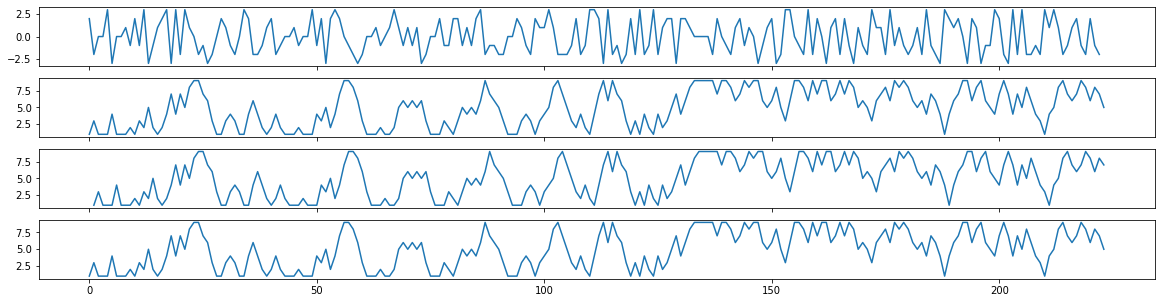

In [25]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['delta_vm'])
ax2.plot(mf['actual_vm_number_is'])
ax3.plot(mf['actual_vm_number_was'])
ax4.plot(mf['worker_number'])
plt.show()

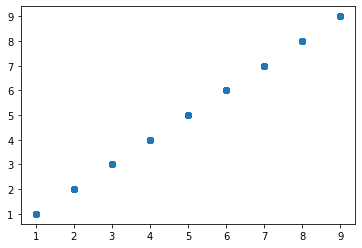

In [26]:
# Ellenőrzés (mert úgy tűnik, hogy a két adatbázisban az éppen aktuális VM szám mindhat egy kicsit mozogna)

plt.scatter(mf['worker_number'], mf['actual_vm_number_is'])
plt.show()

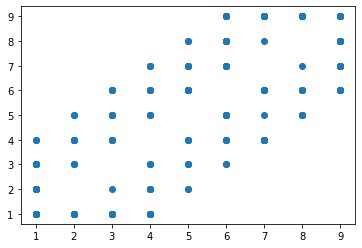

In [27]:
plt.scatter(mf['worker_number'], mf['actual_vm_number_was'])
plt.show()

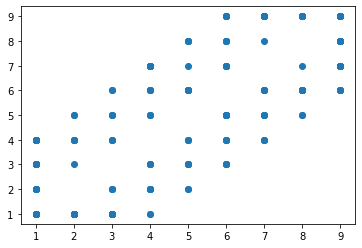

In [28]:
plt.scatter(mf['worker_number'], mf['actual_vm_number_will'])

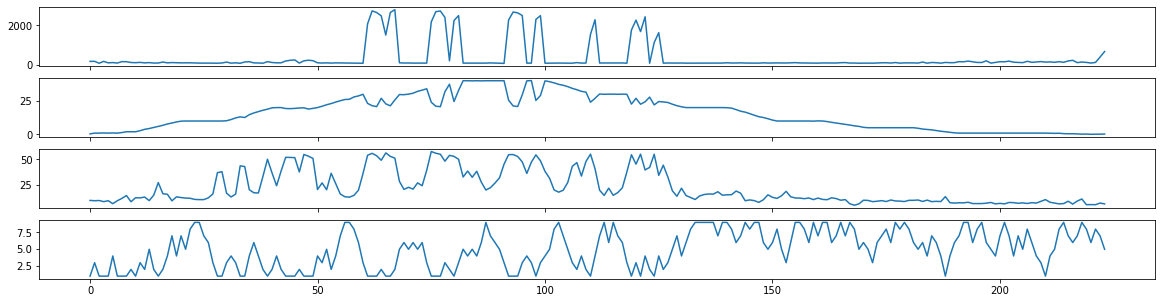

In [29]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['response_time_p95'])
ax2.plot(mf['request_rate'])
ax3.plot(mf['CPU0User%'])
ax4.plot(mf['worker_number'])
plt.show()

In [30]:
ff = mf[['time', 'response_time', 'worker_number', 'request_rate', 'CPU0User%', 'actual_vm_number_is', 'actual_vm_number_will', 'delta_vm']].copy()

In [31]:
ff.head()

,time,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_is,actual_vm_number_will,delta_vm
0,20:07:3,122.845000,1,0.4,9.8,1,3.0,2.0
1,20:07:4,100.906500,3,1.0,9.5,3,1.0,-2.0
2,20:07:5,69.350800,1,1.0,9.7,1,1.0,0.0
3,20:08:0,103.225818,1,1.1,8.6,1,1.0,0.0
4,20:08:1,72.214400,1,1.0,9.5,1,4.0,3.0


In [32]:
f2 = ff.reset_index(drop=True) # nem használom, de ha le kéne resetelni az indexet

In [33]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

# metrics[i]=numpy.dot(bvalues[i],[(metrics[i]*w)/(w+k),(metrics[i]*k)/(w+k),1])

In [34]:
# A time a metrikához tartozik
# a otime a scalerhez
# 19:57:4 kor mérünk valamit (91.6)
# --> az is egy külön jó kérdés, hogy ez mikor kerül birásra a rendszerbe (19:57:4 (0) vagy (9))
# ----> megoldás lehet, hogy beteszek a scaler programba egy időbőjeget is, hogy mikor íra be ezt az adatot

# A sclaer 19:57:42-kor végrehajt egy skálázást

# Ennek az eredménye logikus, hogy csak a 19:57:5 metric mérésnél jelenhet meg

In [35]:
f1 = ff.copy()
f1['CPU0User%Next'] = f1['CPU0User%'].shift(-1)
f1['CPU0User%Prev'] = f1['CPU0User%'].shift(+1)
f1.head()

,time,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_is,actual_vm_number_will,delta_vm,CPU0User%Next,CPU0User%Prev
0,20:07:3,122.845000,1,0.4,9.8,1,3.0,2.0,9.5,NaN
1,20:07:4,100.906500,3,1.0,9.5,3,1.0,-2.0,9.7,9.8
2,20:07:5,69.350800,1,1.0,9.7,1,1.0,0.0,8.6,9.5
3,20:08:0,103.225818,1,1.1,8.6,1,1.0,0.0,9.5,9.7
4,20:08:1,72.214400,1,1.0,9.5,1,4.0,3.0,6.6,8.6


In [36]:
# viszont csak ott kell figyelmebe venni a bf-af értéket ahol ténylegesen volt skálázás

In [37]:
f2 = f1.dropna()
f2.head()

,time,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_is,actual_vm_number_will,delta_vm,CPU0User%Next,CPU0User%Prev
1,20:07:4,100.906500,3,1.0,9.5,3,1.0,-2.0,9.7,9.8
2,20:07:5,69.350800,1,1.0,9.7,1,1.0,0.0,8.6,9.5
3,20:08:0,103.225818,1,1.1,8.6,1,1.0,0.0,9.5,9.7
4,20:08:1,72.214400,1,1.0,9.5,1,4.0,3.0,6.6,8.6
5,20:08:2,81.134727,4,1.1,6.6,4,1.0,-3.0,9.5,9.5


In [38]:
f2.tail()

,time,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_is,actual_vm_number_will,delta_vm,CPU0User%Next,CPU0User%Prev
218,20:43:5,122.8730,9,0.2,11.2,9,8.0,-1.0,5.6,9.2
219,20:44:0,103.9140,8,0.3,5.6,8,6.0,-2.0,5.7,11.2
220,20:44:5,86.0120,6,0.1,5.7,6,8.0,2.0,5.6,5.6
221,20:59:3,99.2095,8,0.2,5.6,8,7.0,-1.0,7.2,5.7
222,20:59:4,328.9600,7,0.2,7.2,7,5.0,-2.0,6.4,5.6


In [39]:
# Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)

indexAge = f2[ (f2['delta_vm'] == 0) ].index
f2.drop(indexAge , inplace=True)

f2.tail()

/home/ubuntu/notebook/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,time,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_is,actual_vm_number_will,delta_vm,CPU0User%Next,CPU0User%Prev
218,20:43:5,122.8730,9,0.2,11.2,9,8.0,-1.0,5.6,9.2
219,20:44:0,103.9140,8,0.3,5.6,8,6.0,-2.0,5.7,11.2
220,20:44:5,86.0120,6,0.1,5.7,6,8.0,2.0,5.6,5.6
221,20:59:3,99.2095,8,0.2,5.6,8,7.0,-1.0,7.2,5.7
222,20:59:4,328.9600,7,0.2,7.2,7,5.0,-2.0,6.4,5.6


In [40]:
# Van-e bárhol NaN

f2['CPU0User%'].isnull().values.any()

for _ in f2.columns:
    print(f2[_].isnull().values.any())

# (3) Check for NaN under an entire DataFrame

print(f2.isnull().values.any())

# (4) Count the NaN under an entire DataFrame

print(f2.isnull().sum())

False
False
False
False
False
False
False
False
False
False
False
time                     0
response_time            0
worker_number            0
request_rate             0
CPU0User%                0
actual_vm_number_is      0
actual_vm_number_will    0
delta_vm                 0
CPU0User%Next            0
CPU0User%Prev            0
dtype: int64


In [41]:
f3 = f2.copy()
f3['cpu_term1'] = f3['CPU0User%'] * f3['worker_number']/(f3['worker_number'] + f3['delta_vm'])
f3['cpu_term2'] = f3['CPU0User%'] * f3['delta_vm']/(f3['worker_number'] + f3['delta_vm'])

In [42]:
print(f3['cpu_term1'].min())
print(f3['cpu_term1'].max())

print(f3['cpu_term2'].min())
print(f3['cpu_term2'].max())

2.375
141.89999999999998
-94.6
41.400000000000006


In [43]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [44]:
# Ez a jó

# A jelenlegi a lapján 'CPU0USer' becsüljük a következő értéket 'CPU0User%Next'

f3 = f2.copy()
f3['cpu_term1'] = f3['CPU0User%'] * f3['worker_number']/(f3['worker_number'] + f3['delta_vm'])
f3['cpu_term2'] = f3['CPU0User%'] * f3['delta_vm']/(f3['worker_number'] + f3['delta_vm'])

# --

_cpu_term = f3[['cpu_term1', 'cpu_term2']]          # jelenlegiekből összeállított term

_cpu_next = f3['CPU0User%Next']                     # a következő mérés értéke

print(_cpu_term.shape, _cpu_next.shape)

lr = LinearRegression(fit_intercept=True)

rr = lr.fit(_cpu_term, _cpu_next)

rr.score(_cpu_term, _cpu_next)

(194, 2) (194,)


0.8891952695428373

In [45]:
rr.coef_

array([0.87016971, 0.58266153])

In [46]:
rr.intercept_

1.8585627908563147

In [47]:
pred_cpu = rr.predict(_cpu_term)

In [48]:
# Átállítom a színeket

from cycler import cycler
import matplotlib as mpl

colormap = plt.get_cmap('jet')
colors = [colormap(k) for k in np.linspace(0, 1, 10)]

mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

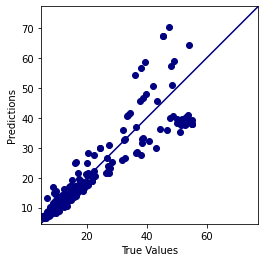

In [49]:
def plot_true_vs_pred(true, pred):
    plt.axes(aspect='equal')
    plt.scatter(true, pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    plt.show()

plot_true_vs_pred(f3['CPU0User%'], pred_cpu)

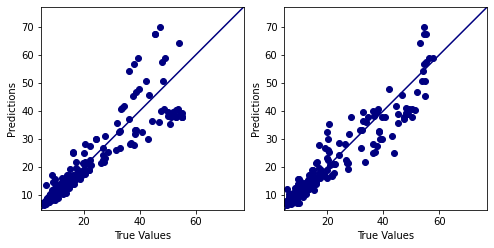

In [50]:
def plot_true_vs_pred_two(true1, pred1, true2, pred2):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(4.0*2, 4.0))
    
    ax0.axis('equal')
    ax0.set_aspect('equal', 'box')
    ax0.scatter(true1, pred1)
    ax0.set_xlabel('True Values')
    ax0.set_ylabel('Predictions')
    _min = np.min((np.min(true1), np.min(pred1)))
    _max = np.max((np.max(true1), np.max(pred1)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    ax0.set_xlim(lims)
    ax0.set_ylim(lims)
    _ = ax0.plot(lims, lims)
    
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    ax1.scatter(true2, pred2)
    ax1.set_xlabel('True Values')
    ax1.set_ylabel('Predictions')
    _min = np.min((np.min(true1), np.min(pred1)))
    _max = np.max((np.max(true1), np.max(pred1)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    ax1.set_xlim(lims)
    ax1.set_ylim(lims)
    _ = ax1.plot(lims, lims)
    
    plt.show()

plot_true_vs_pred_two(f3['CPU0User%'], pred_cpu, f3['CPU0User%Next'], pred_cpu)

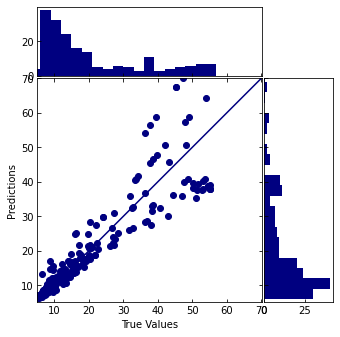

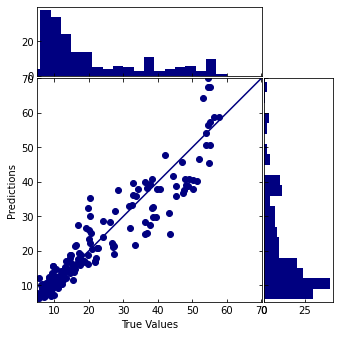

In [51]:
def plot_true_vs_pred_hist(true, pred):

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(4.8, 4.8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    # the scatter plot:
    ax_scatter.scatter(true, pred)

    # now determine nice limits by hand:
    binwidth = 3.00
    lim = np.ceil(np.abs([true, pred]).max() / binwidth) * binwidth
    
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    #_min -= _min/10
    #_max += _max/10
    lims = [_min, _max]
    ax_scatter.plot(lims, lims)
    
    ax_scatter.set_xlim((lims))
    ax_scatter.set_ylim((lims))
    ax_scatter.set_xlabel('True Values')
    ax_scatter.set_ylabel('Predictions')

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(true, bins=bins)
    ax_histy.hist(pred, bins=bins, orientation='horizontal')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())

    plt.show()

plot_true_vs_pred_hist(f3['CPU0User%'].values, pred_cpu)

plot_true_vs_pred_hist(f3['CPU0User%Next'].values, pred_cpu)

In [52]:
import scipy.stats as stats

def calc_true_pred_stats(true, pred, show=True):
    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...
    
    if show == True:
        print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error
    
    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)
    
    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    
    if show == True:
        print('r2 {:.2f}'.format(r2))
        print('r  {:.2f}'.format(r))
        print('mse {:.2f}'.format(mse))
    
    return {'slope': slope, 'intercept': intercept, 'r2': r2, 'r': r, 'mse': mse}

In [53]:
import scipy.stats as stats

def plot_true_vs_pred_hist_conf(true, pred, binwidth=3.00):

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(4.8, 4.8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    # the scatter plot:
    ax_scatter.scatter(true, pred)

    # now determine nice limits by hand:
    # binwidth = 3.00
    binwidth = binwidth
    
    lim = np.ceil(np.abs([true, pred]).max() / binwidth) * binwidth
    
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    #_min -= _min/10
    #_max += _max/10
    lims = [_min, _max]
    ax_scatter.plot(lims, lims)
    
    ax_scatter.set_xlim((lims))
    ax_scatter.set_ylim((lims))
    ax_scatter.set_xlabel('True Values')
    ax_scatter.set_ylabel('Predictions')

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(true, bins=bins)
    ax_histy.hist(pred, bins=bins, orientation='horizontal')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())
    
    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    
    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    # ax_histx.axis('off')
    # ax_histy.axis('off')
    
    # ---------------------------------------------------------------
    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...
    
    print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error
    
    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)
    print('r2 {:.2f}'.format(r2))
    print('r  {:.2f}'.format(r))
    
    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    print('mse {:.2f}'.format(mse))
    
    # to plot the adjusted model
    true_line = np.linspace(np.min(true), np.max(true), 100)
    true_line = np.linspace(min(np.min(true),np.min(pred)), max(np.max(true),np.max(pred)), 100)
    
    pred_line = np.polyval([slope, intercept], true_line)
    
    # confidence interval
    ci = t * std_error * (1/n + (true_line - true_mean)**2 / np.sum((true - true_mean)**2))**.5
    # predicting interval
    pi = t * std_error * (1 + 1/n + (true_line - true_mean)**2 / np.sum((true - true_mean)**2))**.5  

    ax_scatter.plot(true_line, pred_line)
    ax_scatter.fill_between(true_line, pred_line + pi, pred_line - pi, color = 'lightcyan', label = '95% prediction interval')
    ax_scatter.fill_between(true_line, pred_line + ci, pred_line - ci, color = 'skyblue', label = '95% confidence interval')

    # the scatter plot (again):
    ax_scatter.scatter(true, pred)
    
    # rounding and position must be changed for each case and preference
    a = str(np.round(intercept))
    b = str(np.round(slope,2))
    r2s = str(np.round(r2,2))
    MSEs = str(np.round(mse))
    
    # ax_scatter.text(20, 64, 'y = ' + a + ' + ' + b + ' x')
    # ax_scatter.text(20, 60, '$r^2$ = ' + r2s + '     MSE = ' + MSEs)
    
    # ax_scatter.legend(fontsize=12)
    ax_scatter.legend(frameon=False)
    
    
    # a belső (pici) 95% Confidence region
    # a külső (nagy) 95% Confidence interval
    
    plt.show()


slope 0.86 int 3.00
r2 0.81
r  0.90
mse 43.87


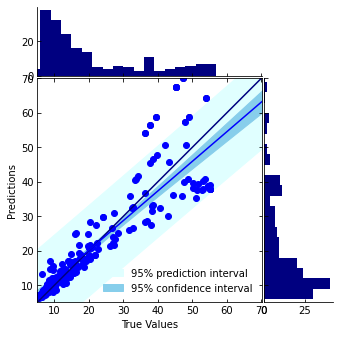

slope 0.89 int 2.35
r2 0.89
r  0.94
mse 25.76


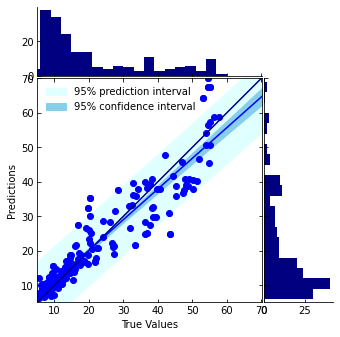

In [54]:
plot_true_vs_pred_hist_conf(f3['CPU0User%'].values, pred_cpu)

plot_true_vs_pred_hist_conf(f3['CPU0User%Next'].values, pred_cpu)

In [55]:
# Egy gyors ellenörzés -> hogy vátozna, ha a 'k' (delta_vm) számát én állítanám be

In [56]:
# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [57]:
_cpu_usage = 90
_actual_vm = 2
_delta_vm = 10

_t1 = _cpu_usage * _actual_vm/(_actual_vm + _delta_vm)
_t2 = _cpu_usage * _delta_vm/(_actual_vm + _delta_vm)

_x = np.array([[_t1, _t2]])

print(_x.shape)
print(_x)

_pred = rr.predict(_x)

print(_pred)

# Jó, a model azt mondja, hogy ha 1 darab VM-t hozzáadok akkor csökkenni fog a CPU Usage

(1, 2)
[[15. 75.]]
[58.61072306]


/home/ubuntu/notebook/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [63]:
from sklearn.linear_model import LinearRegression

def create_model_for_metric(columnname: str, short=False, binwidth=3.0):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)

    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]
    
    print(__metric_term.shape, __metric_next.shape)

    lr = LinearRegression(fit_intercept=True)

    rr = lr.fit(__metric_term, __metric_next)
    
    # _ = joblib.dump(lr, './lr/lr_' + columnname + '.joblib', compress=9)

    __fit_score = rr.score(__metric_term, __metric_next)
    
    __fit_coef_ = rr.coef_
    
    __fit_intercept_ = rr.intercept_
    
    __pred_metric = rr.predict(__metric_term)
    
    if short == True:
        print('score  =', __fit_score)
        print('coef   =', __fit_coef_)
        print('intcpt =', __fit_intercept_)

        print()
    
    # Uristen geci bazmeg, hogy én mekkora fasz vagyok
#    plot_true_vs_pred(f1[columnname].values, __pred_metric)
    # Ez itt a before vs pred_next
    # Nem pedig a next vs pred_next
    
#    plot_true_vs_pred(f1[__next_name].values, __pred_metric)
    # ugyan ez
    # plot_true_vs_pred(__metric_next, __pred_metric)

# A fenti kettő helyett van most ez az egy -> hogy egymás mellett legyenek
    if short == False:
        plot_true_vs_pred_two(f1[columnname].values, __pred_metric, f1[__next_name].values, __pred_metric)
    
    plot_true_vs_pred_hist_conf(f1[__next_name].values, __pred_metric, binwidth)


In [64]:
# Ezek itt a delta_metric_pred, delta_metric_true pred plottok

# Az lr álltal a metrika pred after scaling vs metrika true after scaling értékeket vetik össze.

# True vs Pred

# ------------

# Viszont a score, coef, intercpt értékek a modellből vannak számolva

# Viszont a slope, r2, r, mse viszot a becslés jóságát nézik (pred vs true)

(194, 2) (194,)
score  = 0.8891952695428373
coef   = [0.87016971 0.58266153]
intcpt = 1.8585627908563147

slope 0.89 int 2.35
r2 0.89
r  0.94
mse 25.76


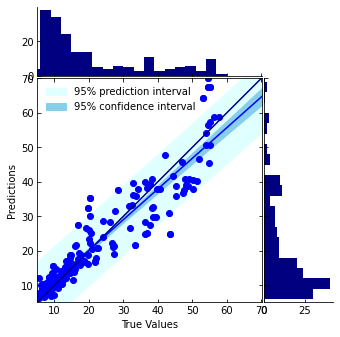

In [65]:
create_model_for_metric('CPU0User%', short=True)

(194, 2) (194,)


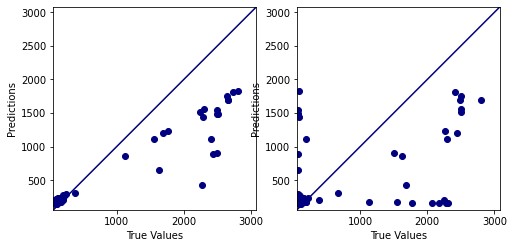

slope 0.33 int 211.73
r2 0.33
r  0.57
mse 268503.77


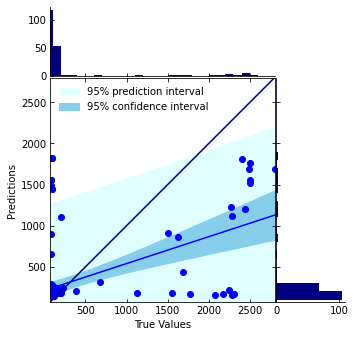

In [68]:
create_model_for_metric('response_time_p95', binwidth=100.0)

(194, 2) (194,)


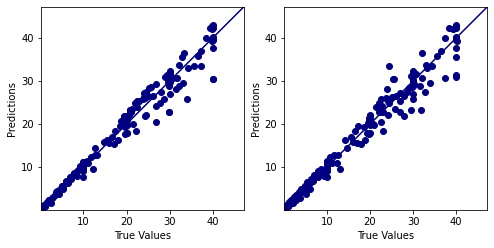

slope 0.97 int 0.46
r2 0.97
r  0.99
mse 4.73


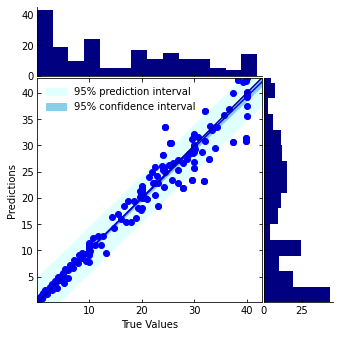

In [69]:
create_model_for_metric('request_rate')

(194, 2) (194,)


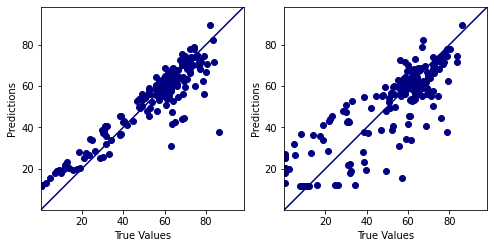

slope 0.69 int 16.38
r2 0.69
r  0.83
mse 154.14


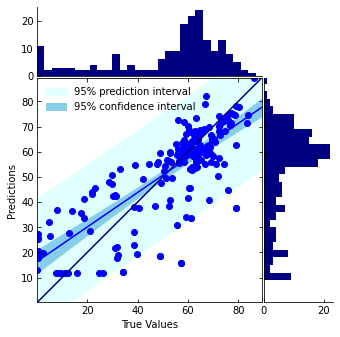

In [70]:
create_model_for_metric('CPU0Idle%')

(194, 2) (194,)


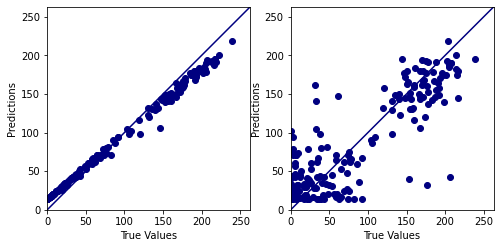

slope 0.73 int 22.57
r2 0.73
r  0.86
mse 1471.75


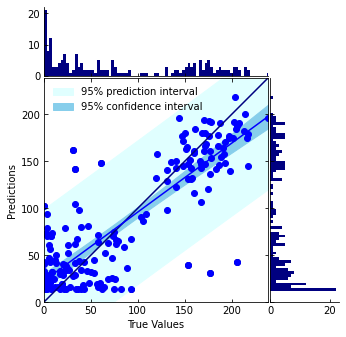

In [71]:
create_model_for_metric('[DSK:sda]RMerge')

(194, 2) (194,)


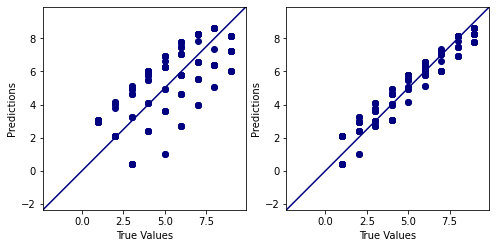

slope 0.91 int 0.47
r2 0.91
r  0.95
mse 0.58


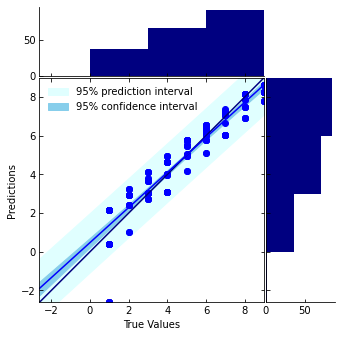

In [72]:
create_model_for_metric('worker_number')

# szerintem valami alapjaiban nem jó

# hogy lehet az, hogy ezt nem képes tökéletesen megmondani?

maaaaaa

In [74]:
from sklearn.linear_model import LinearRegression

def get_all(columnname: str, short=True):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]

    
    s = (__metric_term.shape, __metric_next.shape)
    

    lr = LinearRegression(fit_intercept=True)
    rr = lr.fit(__metric_term, __metric_next)
    rr.score(__metric_term, __metric_next)

    __fit_score = rr.score(__metric_term, __metric_next)
    __fit_coef_ = rr.coef_
    __fit_intercept_ = rr.intercept_

    __pred_metric = rr.predict(__metric_term)

    if short == False:
        print('score  =', __fit_score)
        print('coef   =', __fit_coef_)
        print('intcpt =', __fit_intercept_)

        print()
    
#--------------------

    true = f1[__next_name].values
    pred = __pred_metric

    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...

    if short == False:
        print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error

    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)

    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    
    if short == False:
    
        print('r2 {:.2f}'.format(r2))
        print('r  {:.2f}'.format(r))
        print('mse {:.2f}'.format(mse))

    return {'f1.shape': s,
            'score_or': __fit_score,
            'coef_or': __fit_coef_,
            'intercept_or': __fit_intercept_,
            'slope_tp': slope,
            'intercept_tp': intercept,
            'r2': r2,
            'r': r,
            'mse': mse}

In [75]:
get_all('CPU0Total%')

{'f1.shape': ((194, 2), (194,)),
 'score_or': 0.9000095691719929,
 'coef_or': array([0.87125765, 0.57701614]),
 'intercept_or': 3.239872776265514,
 'slope_tp': 0.9000095691719932,
 'intercept_tp': 3.799739454382645,
 'r2': 0.9000095691719927,
 'r': 0.9486883414335778,
 'mse': 77.15242046307432}

In [76]:
# Fentinek meg az alábbinak azonosnak kell lennie -> ez csak egy ellenőrzés

(194, 2) (194,)
score  = 0.9000095691719929
coef   = [0.87125765 0.57701614]
intcpt = 3.239872776265514

slope 0.90 int 3.80
r2 0.90
r  0.95
mse 77.15


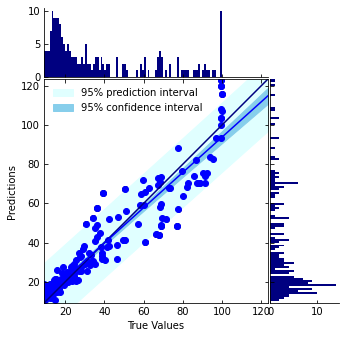

In [79]:
create_model_for_metric('CPU0Total%', short=True, binwidth=1.0)

In [80]:
print(colored('---------------------------------------', 'yellow'))
print(colored('---------------------------------------', 'red'))
print(colored('---------------------------------------', 'blue'))
print(colored('---------------------------------------', 'green'))
print(colored('---------------------------------------', 'magenta'))
print(colored('---------------------------------------', 'cyan'))

print(colored('--------------', color='red', on_color='on_grey'))

print(colored('--------------', color='red', on_color='on_grey', attrs=['bold']))

print(colored('--------------', color='red', on_color='on_grey', attrs=['bold', 'reverse']))

print(colored('--------------', color='red', on_color='on_grey', attrs=['bold', 'concealed']))

---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
--------------
--------------
--------------
--------------


In [81]:
def get_terms_for_metric(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next

In [89]:
import statsmodels.api as sm

__metric_term, __metric_next = get_terms_for_metric('CPU0Total%')

_x = sm.add_constant(__metric_term)

print(type(_x), _x.shape)

model = sm.OLS(__metric_next, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
print(f'\nregression coefficients: {results.params}')    
# print(f'predicted response:\n{results.fittedvalues}')
# print(f'predicted response:\n{results.predict(_x.loc[l])}')
print('------------------------------------------------------------------------------')
print(colored('------------------------------------------------------------------------------', color='red', on_color='on_grey', attrs=['bold', 'concealed']))


<class 'pandas.core.frame.DataFrame'> (194, 3)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:         CPU0Total%Next   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 13 May 2023   Prob (F-statistic):           3.13e-96
Time:                        19:02:12   Log-Likelihood:                -696.82
No. Observations:                 194   AIC:                             1400.
Df Residuals:                     191   BIC:                             1409.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]

In [83]:
# Naiv
#  m′ = m · w/(w + k)

In [91]:
import statsmodels.api as sm

__metric_term, __metric_next = get_terms_for_metric('CPU0Total%')

print(__metric_term.columns)

# Naiv -> csak az első tagot veszem figyelembe
__metric_term = __metric_term.drop(['CPU0Total%_term2'], axis=1)

_x = sm.add_constant(__metric_term)

print(type(_x), _x.shape)

model = sm.OLS(__metric_next, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
print(f'\nregression coefficients: {results.params}')    
# print(f'predicted response:\n{results.fittedvalues}')
# print(f'predicted response:\n{results.predict(_x.loc[l])}')
print('------------------------------------------------------------------------------')
print(colored('------------------------------------------------------------------------------', color='red', on_color='on_grey', attrs=['bold', 'concealed']))


Index(['CPU0Total%_term1', 'CPU0Total%_term2'], dtype='object')
<class 'pandas.core.frame.DataFrame'> (194, 2)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:         CPU0Total%Next   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     390.6
Date:                Sat, 13 May 2023   Prob (F-statistic):           3.67e-48
Time:                        19:02:43   Log-Likelihood:                -812.50
No. Observations:                 194   AIC:                             1629.
Df Residuals:                     192   BIC:                             1636.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    

In [84]:
# Paraszt

# m' = b0 + b1*m + b2*w + b3*k

In [145]:
def create_model_for_metric_paraszt(columnname: str):
    
    ''' # Paraszt
        # m' = b0 + b1*m + b2*w + b3*k'
    '''
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)

    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    __metric_term3 = columnname + '_term3'
    
    f1[__metric_term1] = f1[columnname]
    f1[__metric_term2] = f1['worker_number']
    f1[__metric_term3] = f1['delta_vm']
    
    
    __metric_term = f1[[__metric_term1, __metric_term2, __metric_term3]]
    __metric_next = f1[__next_name]

    lr = LinearRegression(fit_intercept=True)

    rr = lr.fit(__metric_term, __metric_next)
    
    # _ = joblib.dump(lr, './lr/lr_' + columnname + '.joblib', compress=9)

    __fit_score = rr.score(__metric_term, __metric_next)
    
    __fit_coef_ = rr.coef_
    
    __fit_intercept_ = rr.intercept_
    
    __pred_metric = rr.predict(__metric_term)
    
    print(__fit_score)
    print(__fit_coef_)
    print(__fit_intercept_)
    
    print()
    
    # Uristen geci bazmeg, hogy én mekkora fasz vagyok
#    plot_true_vs_pred(f1[columnname].values, __pred_metric)
    # Ez itt a before vs pred_next
    # Nem pedig a next vs pred_next
    
#    plot_true_vs_pred(f1[__next_name].values, __pred_metric)
    # ugyan ez
    # plot_true_vs_pred(__metric_next, __pred_metric)

# A fenti kettő helyett van most ez az egy -> hogy egymás mellett legyenek
    plot_true_vs_pred_two(f1[columnname].values, __pred_metric, f1[__next_name].values, __pred_metric)


score  = 0.6855208987373714
coef   = [0.81839626 0.98981005]
intcpt = 11.573752182180385



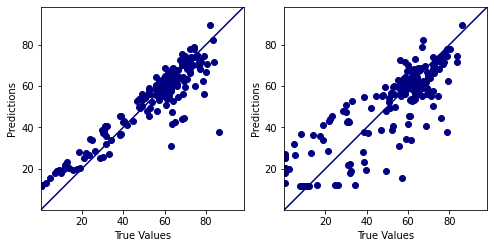

slope 0.69 int 16.38
r2 0.69
r  0.83
mse 154.14


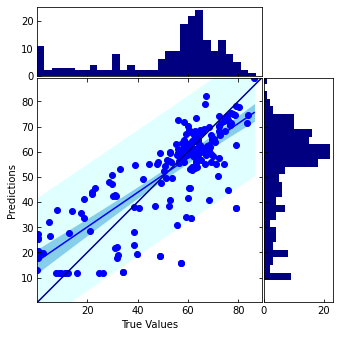

In [146]:
# régi (original)
create_model_for_metric('CPU0Idle%')

0.7682550589932344
[0.80350618 1.03502105 7.04207059]
4.179908065191782



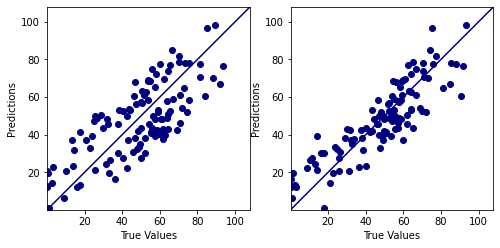

In [88]:
# paraszt (new)
create_model_for_metric_paraszt('CPU0Idle%')

score  = 0.8320595206309692
coef   = [0.81781785 0.39969183]
intcpt = 6.455266131865379



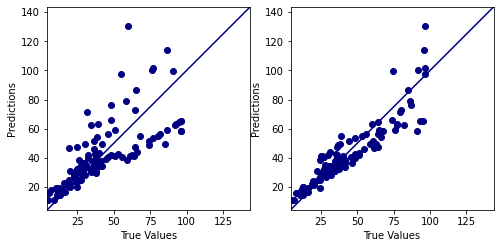

In [89]:
# régi (original)
create_model_for_metric('CPU0User%')

0.78667813257467
[ 0.78161332 -1.59679038 -7.97386945]
17.029311984268297



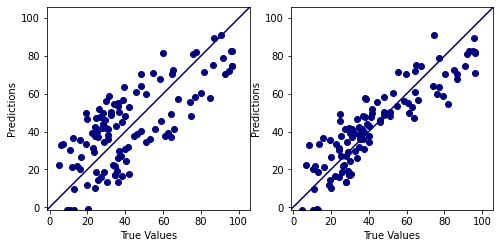

In [90]:
# paraszt (new)
create_model_for_metric_paraszt('CPU0User%')

score  = 0.8787600148495298
coef   = [0.78255258 1.32003705]
intcpt = 1.6774930073374184



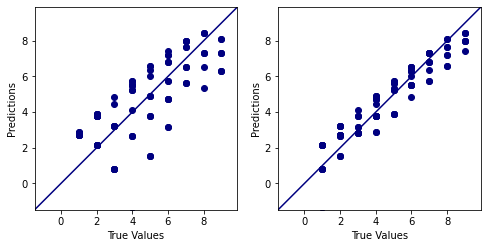

In [91]:
# régi (original)
create_model_for_metric('worker_number')

1.0
[0.5 0.5 1. ]
-2.6645352591003757e-15



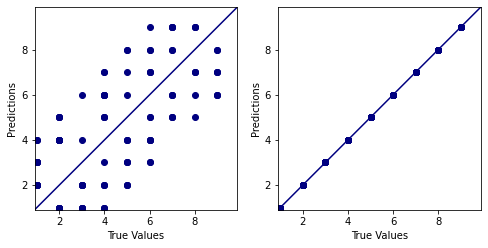

In [92]:
# paraszt (new)
create_model_for_metric_paraszt('worker_number')

In [93]:
# Hát ha az új plottot a valósat, a jót, a helyeset nézem (akármelyik modellel is) a kép már nem annyira rózsás

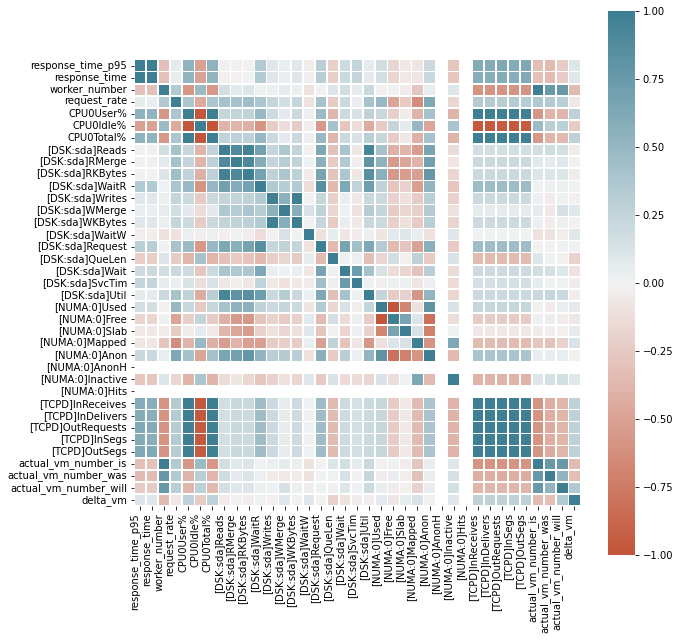

In [94]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

corr = mf.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=False, linewidths=0.5, ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [95]:
input_variables = ['CPU0User%', '[DSK:sda]WKBytes', 'request_rate', 'response_time', 'worker_number']

In [96]:
mf[input_variables].corr()

,CPU0User%,[DSK:sda]WKBytes,request_rate,response_time,worker_number
CPU0User%,1.000000,0.205672,0.378135,0.534402,-0.573175
[DSK:sda]WKBytes,0.205672,1.000000,0.243393,0.092864,0.024000
request_rate,0.378135,0.243393,1.000000,0.046132,0.351701
response_time,0.534402,0.092864,0.046132,1.000000,-0.304572
worker_number,-0.573175,0.024000,0.351701,-0.304572,1.000000


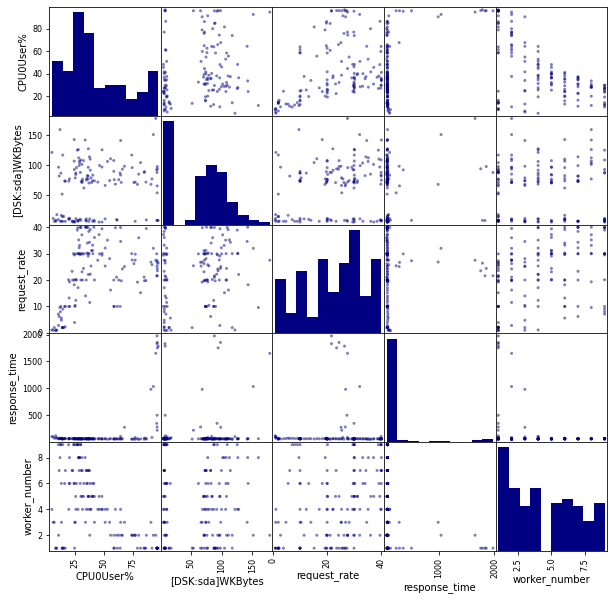

In [136]:
from pandas.plotting import scatter_matrix

scatter_matrix(mf[input_variables], figsize=(10,10))
plt.show()

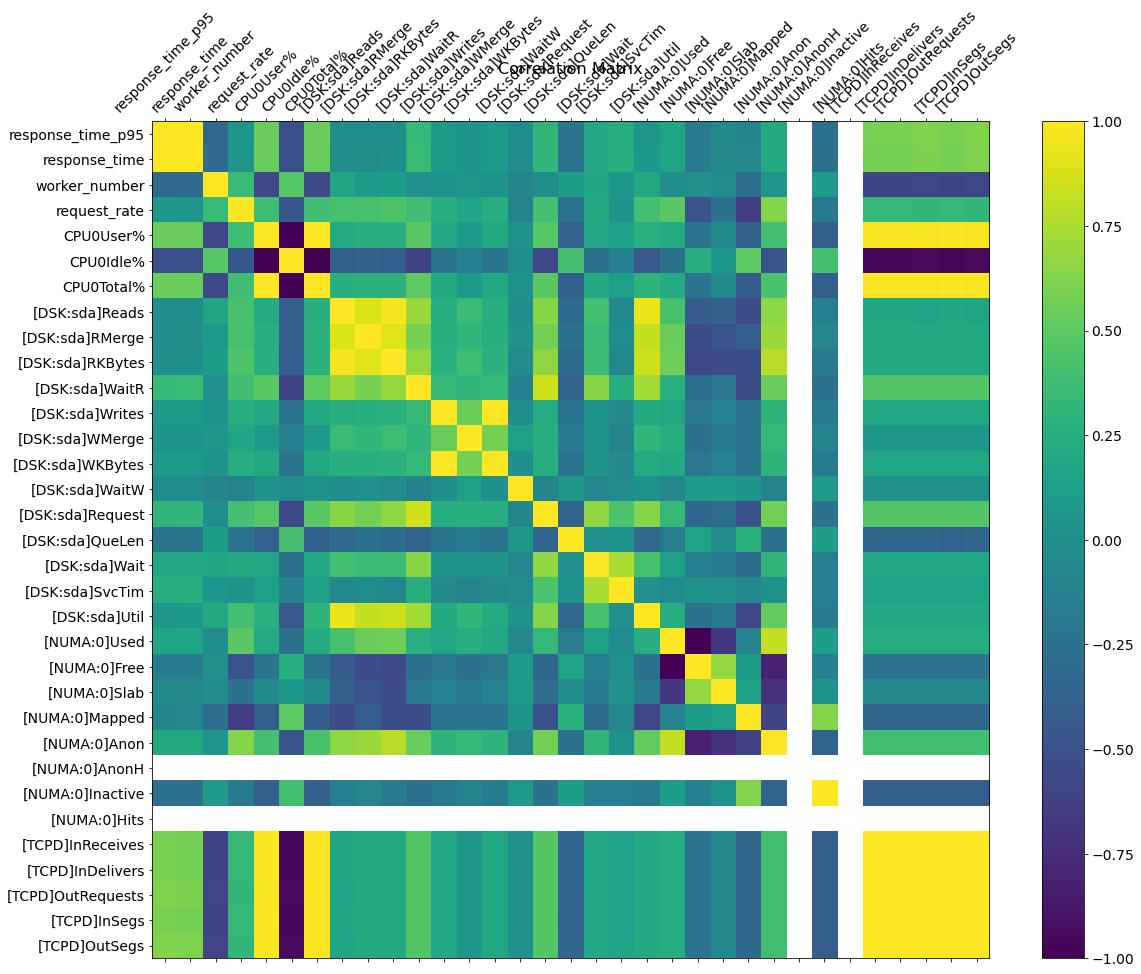

In [98]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

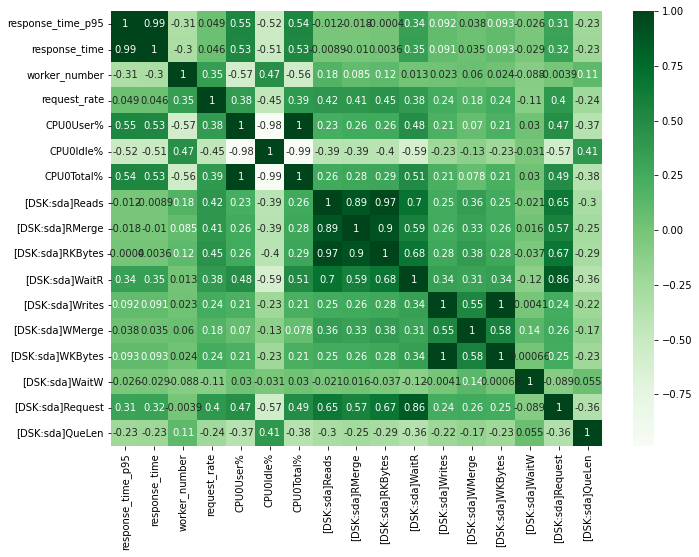

In [99]:

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(18, 18))
df= mf.iloc[: , [3,4,5,6,7,8,9,10,11,12,13,14,17]].copy()

df = mf.iloc[:, :20]
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

In [ ]:
g = sns.clustermap(df.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

In [ ]:
sns.regplot(x=mf['worker_number'],
            y=mf['CPU0Total%'],
            scatter_kws={
                "color": "black",
                "alpha": 0.5
            },
            line_kws={"color": "red"})
plt.show()

# ugyan az
sns.regplot(x='worker_number',
            y='CPU0Total%',
            data=mf,
            scatter_kws={
                "color": "black",
                "alpha": 0.5
            },
            line_kws={"color": "red"})
plt.plot()

In [ ]:
sns.regplot(x = mf['[NUMA:0]Anon'], y = mf['CPU0Total%'],
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 95)
plt.show()

In [ ]:
sns.jointplot(x='[NUMA:0]Mapped', y='CPU0Total%', data=mf, kind='reg');

In [ ]:
sns.pairplot(mf, x_vars=['CPU0Total%', '[NUMA:0]Mapped'], y_vars=['[TCPD]InReceives'],
             height=5, aspect=.8, kind='reg');

In [ ]:
# Nézzük melyik metrikákkal correlál a worker_number és a delta_vm

# valójában a delta_m delta_vm érdekelne

In [100]:
an = mf.copy()

# Remove column name [...]
an = an.drop(['worker_give_metrics'], axis=1)
an = an.drop(['actual_vm_number_is', 'actual_vm_number_was', 'actual_vm_number_will'], axis=1)

# minden metrikára megcsinálni a nextet és kiszámolni a delta metrikát

column_names = an.columns

for columnname in column_names:

    __next_name = columnname + 'Nxt'

    an[__next_name] = an[columnname].shift(-1)

indexAge = an[ (an['delta_vm'] == 0) ].index
an.drop(indexAge , inplace=True)
an = an.dropna()


for columnname in column_names:
    
    if an[columnname].values.dtype != object:
        __next_name = columnname + 'Nxt'
        __delta_next_name = columnname + 'NextDelta'
        an[__delta_next_name] = an[__next_name] - an[columnname]

# an = an[an.columns.drop(list(an.filter(regex='Nxt')))]

an.head()

,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,[DSK:sda]Reads,...,[NUMA:0]AnonNextDelta,[NUMA:0]AnonHNextDelta,[NUMA:0]InactiveNextDelta,[NUMA:0]HitsNextDelta,[TCPD]InReceivesNextDelta,[TCPD]InDeliversNextDelta,[TCPD]OutRequestsNextDelta,[TCPD]InSegsNextDelta,[TCPD]OutSegsNextDelta,delta_vmNextDelta
0,16:33:51,16:33:5,191.46895,119.91425,1,0.8,8.0,89.3,9.0,13.1,...,2216.4,0.0,-10924.4,0.0,-1.6,-1.6,-1.4,-1.6,-1.3,-4.0
1,16:34:00,16:34:0,162.54745,99.68830,3,1.0,5.8,83.8,8.3,64.0,...,-3490.0,0.0,-3572.8,0.0,1.7,1.7,1.0,1.7,0.9,2.0
3,16:34:20,16:34:2,112.08605,80.62270,1,1.0,9.0,89.3,10.4,7.7,...,491.6,0.0,1516.8,0.0,-3.7,-3.7,-3.7,-3.7,-3.7,-4.0
4,16:34:30,16:34:3,180.54650,104.01500,4,1.1,4.7,93.5,6.1,5.1,...,132.8,0.0,1132.0,0.0,1.5,1.5,1.4,1.5,1.4,-1.0
5,16:34:40,16:34:4,105.77025,74.38680,3,2.0,6.8,91.8,8.0,4.9,...,12.4,0.0,384.8,0.0,9.1,9.1,8.3,9.1,8.3,2.0


In [101]:
tmp = an[['worker_number', 'delta_vm', 'CPU0Total%', 'CPU0Total%Nxt', 'CPU0Total%NextDelta']]

tmp.head()

,worker_number,delta_vm,CPU0Total%,CPU0Total%Nxt,CPU0Total%NextDelta
0,1,2.0,9.0,8.3,-0.7
1,3,-2.0,8.3,9.1,0.8
3,1,3.0,10.4,6.1,-4.3
4,4,-1.0,6.1,8.0,1.9
5,3,-2.0,8.0,15.0,7.0


In [102]:
# Oké eddig jó

# delta_vm-re agregálni a delta_metrikát
an.groupby(['delta_vm'])['CPU0Total%NextDelta'].mean()

delta_vm
-3.0    25.258333
-2.0    16.736364
-1.0     9.060000
 1.0    -8.778947
 2.0   -15.760000
 3.0   -21.816667
Name: CPU0Total%NextDelta, dtype: float64

In [103]:
# Oké eddig jó

# erre kéne csinálni valami ANOVA elemzés és F-statistikát

# https://www.reneshbedre.com/blog/anova.html

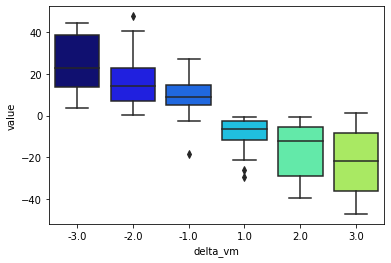

,sum_sq,df,F,PR(>F)
C(delta_vm),29206.417418,5.0,39.338236,6.408946e-23
Residual,16185.268321,109.0,NaN,NaN


In [186]:
# Oké ez eddig jó

av = an[['delta_vm', 'response_timeNextDelta', 'CPU0Total%NextDelta', 'CPU0User%NextDelta', '[NUMA:0]SlabNextDelta', '[TCPD]OutSegsNextDelta']]

# Csak egy változó értdekel
tmp = av[['delta_vm', 'CPU0Total%NextDelta']]
tmp_melt = pd.melt(tmp.reset_index(), id_vars=['delta_vm'], value_vars=['CPU0Total%NextDelta'])

tmp_melt = pd.melt(tmp, id_vars=['delta_vm'], value_vars=['CPU0Total%NextDelta'])
tmp_melt = tmp_melt.drop('variable', axis=1)

ax = sns.boxplot(x="delta_vm", y="value", data=tmp_melt)
# ax = sns.boxplot(x="delta_vm", y="value", data=tmp_melt, color='#7d0013')
# ax = sns.swarmplot(x='delta_vm', y='value', data=tmp_melt, size=5)
# ax = sns.swarmplot(x='delta_vm', y='value', data=tmp_melt, color='#7d0013', size=5)
plt.show()

import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('value ~ C(delta_vm)', data=tmp_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [ ]:
# Interpretation

# The p value obtained from ANOVA analysis for delta_vm are statistically significant (p<0.05).
# We conclude that type of delta_vm significantly affects the yield outcome (the change of the CPU usage)

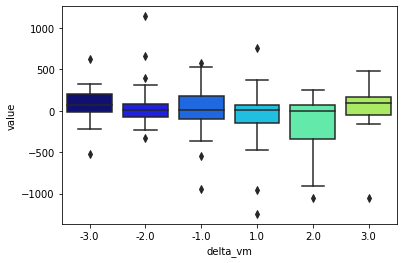

,sum_sq,df,F,PR(>F)
C(delta_vm),1.029083e+06,5.0,1.64268,0.154786
Residual,1.365696e+07,109.0,NaN,NaN


In [187]:
# Oké ez eddig jó

av = an[['delta_vm', 'response_timeNextDelta', 'CPU0Total%NextDelta', 'CPU0User%NextDelta', '[NUMA:0]SlabNextDelta', '[TCPD]OutSegsNextDelta']]

# Csak egy változó értdekel
tmp = av[['delta_vm', '[NUMA:0]SlabNextDelta']]
tmp_melt = pd.melt(tmp, id_vars=['delta_vm'], value_vars=['[NUMA:0]SlabNextDelta'])
tmp_melt = tmp_melt.drop('variable', axis=1)

ax = sns.boxplot(x="delta_vm", y="value", data=tmp_melt)
plt.show()

model = ols('value ~ C(delta_vm)', data=tmp_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [ ]:
# Interpretation

# Érdekes itt például nem szignifikáns az eltérés.

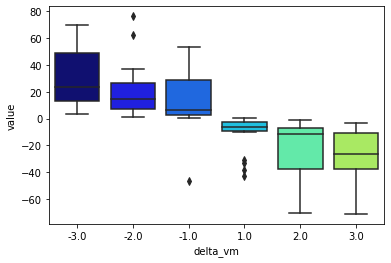

,sum_sq,df,F,PR(>F)
C(delta_vm),48831.140413,5.0,24.606527,1.622192e-16
Residual,43261.646022,109.0,NaN,NaN


In [188]:
# Oké ez eddig jó

av = an[['delta_vm', 'response_timeNextDelta', 'CPU0Total%NextDelta', 'CPU0User%NextDelta', '[NUMA:0]SlabNextDelta', '[TCPD]OutSegsNextDelta']]

# Csak egy változó értdekel
tmp = av[['delta_vm', '[TCPD]OutSegsNextDelta']]
tmp_melt = pd.melt(tmp, id_vars=['delta_vm'], value_vars=['[TCPD]OutSegsNextDelta'])
tmp_melt = tmp_melt.drop('variable', axis=1)

ax = sns.boxplot(x="delta_vm", y="value", data=tmp_melt)
plt.show()

model = ols('value ~ C(delta_vm)', data=tmp_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [ ]:
# Interpretation

# The p value obtained from ANOVA analysis for delta_vm are statistically significant (p<0.05).
# We conclude that type of delta_vm significantly affects the yield outcome (the change of the TCP Sent out packet)

In [283]:

aa = an[an.columns.drop(list(an.filter(regex='^((?!NextDelta).)*$')))]

aa.columns

# jobb ez mint a regex

aa = an[an.columns.difference([i for i in an.columns if 'NextDelta' not in i])]

aa = an[an.columns.difference([i for i in an.columns if ('NextDelta' not in i) and ('delta_vm' not in i)])]

aa = aa.drop('worker_numberNextDelta', axis=1)

aa.columns


Index(['CPU0Idle%NextDelta', 'CPU0Total%NextDelta', 'CPU0User%NextDelta',
       '[DSK:sda]QueLenNextDelta', '[DSK:sda]RKBytesNextDelta',
       '[DSK:sda]RMergeNextDelta', '[DSK:sda]ReadsNextDelta',
       '[DSK:sda]RequestNextDelta', '[DSK:sda]SvcTimNextDelta',
       '[DSK:sda]UtilNextDelta', '[DSK:sda]WKBytesNextDelta',
       '[DSK:sda]WMergeNextDelta', '[DSK:sda]WaitNextDelta',
       '[DSK:sda]WaitRNextDelta', '[DSK:sda]WaitWNextDelta',
       '[DSK:sda]WritesNextDelta', '[NUMA:0]AnonHNextDelta',
       '[NUMA:0]AnonNextDelta', '[NUMA:0]FreeNextDelta',
       '[NUMA:0]HitsNextDelta', '[NUMA:0]InactiveNextDelta',
       '[NUMA:0]MappedNextDelta', '[NUMA:0]SlabNextDelta',
       '[NUMA:0]UsedNextDelta', '[TCPD]InDeliversNextDelta',
       '[TCPD]InReceivesNextDelta', '[TCPD]InSegsNextDelta',
       '[TCPD]OutRequestsNextDelta', '[TCPD]OutSegsNextDelta', 'delta_vm',
       'delta_vmNextDelta', 'delta_vmNxt', 'request_rateNextDelta',
       'response_timeNextDelta', 'response_time_p

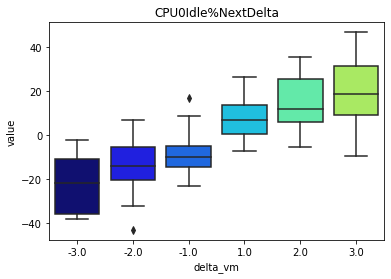

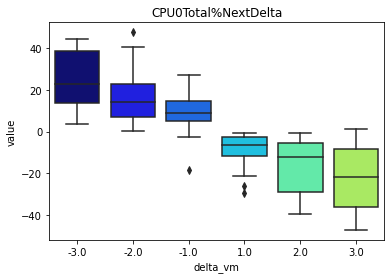

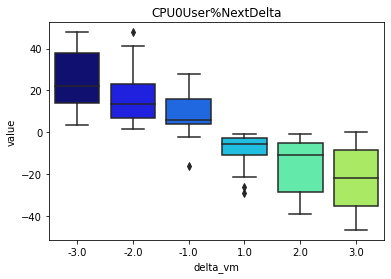

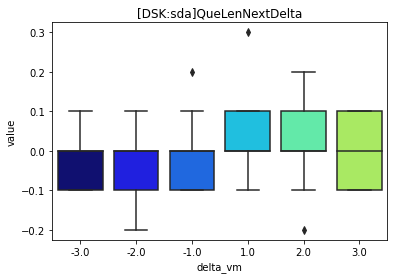

/home/ubuntu/notebook/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/home/ubuntu/notebook/lib/python3.8/site-packages/statsmodels/base/model.py:1900: RuntimeWarning: invalid value encountered in true_divide
  F /= J
/home/ubuntu/notebook/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 0
  warnings.warn('covariance of constraints does not have full '


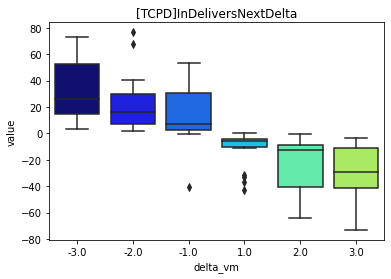

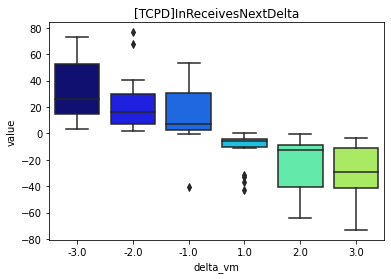

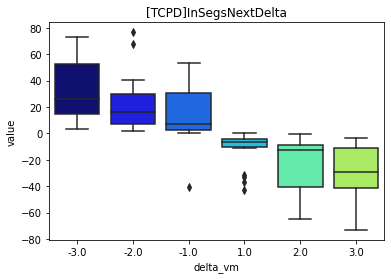

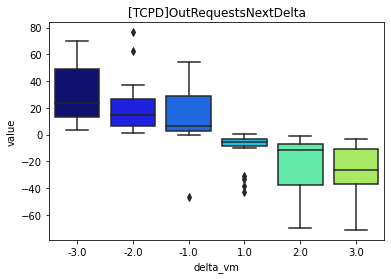

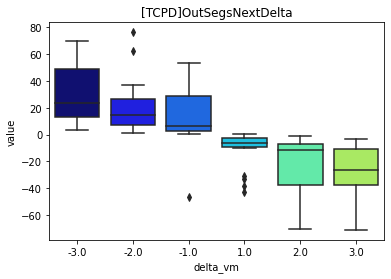

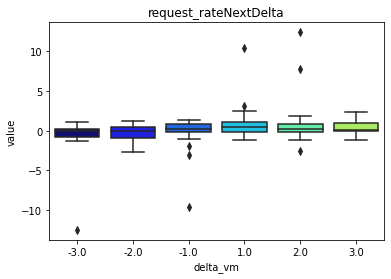

,Metric,sig
0,CPU0Idle%NextDelta,0.00
1,CPU0Total%NextDelta,0.00
2,CPU0User%NextDelta,0.00
3,[DSK:sda]QueLenNextDelta,0.01
4,[DSK:sda]RKBytesNextDelta,0.92
5,[DSK:sda]RMergeNextDelta,0.75
6,[DSK:sda]ReadsNextDelta,0.95
7,[DSK:sda]RequestNextDelta,0.93
8,[DSK:sda]SvcTimNextDelta,0.31
9,[DSK:sda]UtilNextDelta,1.00


In [294]:
# Oké eddig jó

# Ennél mélyebben szerintem nem kell foglalkozni azzal, hogy delta_vm milyen delta_vm hatást ért el az egyes
# metrikákban.

# Esetleg amire még kíváncs lennék, hogy ha szisztematikusan kiszámolnám az F-statisztikát minden delta_metrikára
# akkor melyek lennének szignifikánsak

# Oké ez eddig jó

sig_s = []

for i in aa.columns:
    if 'delta_vm' not in i:
        # Csak egy változó értdekel
        tmp = aa[['delta_vm', i]]
        tmp_melt = pd.melt(tmp, id_vars=['delta_vm'], value_vars=[i])
        tmp_melt = tmp_melt.drop('variable', axis=1)
        
        model = ols('value ~ C(delta_vm)', data=tmp_melt).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        sig = anova_table['PR(>F)'][0]
        
        if sig < 0.1:
            ax = sns.boxplot(x="delta_vm", y="value", data=tmp_melt)
            ax.set_title(i)
            plt.show()
        
        sig_s.append([i, sig])

sig = pd.DataFrame(sig_s)
sig.columns = ['Metric', 'sig']

sig['sig'] = sig['sig'].apply(lambda x: float("{:.2f}".format(x)))

sig


In [ ]:
# Oké eddig jó

# Most már látom, hogy melyek azok a metrikák amelyek signifiánsan változnak a delta_vm hatására az adott feladatban



In [295]:
# Oké eddig jó

# lehet egyszerre több változóra is megcsinálni az aggregációt
an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].mean()

,CPU0Total%NextDelta,CPU0User%NextDelta
delta_vm,,
-3.0,25.25833,25.29167
-2.0,16.73636,16.70000
-1.0,9.06000,8.92000
1.0,-8.77895,-8.73684
2.0,-15.76000,-15.61200
3.0,-21.81667,-21.95833


In [296]:
# Oké eddig jó

# lehet egyszerre több változóra is megcsinálni az aggregációt
l = an.columns[73:80]
an.groupby(['delta_vm'])[l].mean()

,response_timeNextDelta,worker_numberNextDelta,request_rateNextDelta,CPU0User%NextDelta,CPU0Idle%NextDelta,CPU0Total%NextDelta,[DSK:sda]ReadsNextDelta
delta_vm,,,,,,,
-3.0,35.63702,-3.0,-1.03333,25.29167,-22.52500,25.25833,2.15833
-2.0,4.31883,-2.0,-0.18182,16.70000,-14.55000,16.73636,-5.75000
-1.0,-16.70225,-1.0,-0.21200,8.92000,-8.63600,9.06000,8.58800
1.0,-72.55387,1.0,1.08421,-8.73684,7.58947,-8.77895,1.24211
2.0,-70.72484,2.0,0.98400,-15.61200,13.90800,-15.76000,2.08000
3.0,0.02472,3.0,0.37500,-21.95833,19.35000,-21.81667,4.88333


In [297]:
# Oké eddig jó

# lehet egyszerre több változóra is megcsinálni az aggregációt csak a deltákra és elforgatva
l = an.columns[73:105]
an.groupby(['delta_vm'])[l].mean().round(2).T

delta_vm,-3.0,-2.0,-1.0,1.0,2.0,3.0
response_timeNextDelta,35.64,4.32,-16.70,-72.55,-70.72,0.02
worker_numberNextDelta,-3.00,-2.00,-1.00,1.00,2.00,3.00
request_rateNextDelta,-1.03,-0.18,-0.21,1.08,0.98,0.37
CPU0User%NextDelta,25.29,16.70,8.92,-8.74,-15.61,-21.96
CPU0Idle%NextDelta,-22.52,-14.55,-8.64,7.59,13.91,19.35
CPU0Total%NextDelta,25.26,16.74,9.06,-8.78,-15.76,-21.82
[DSK:sda]ReadsNextDelta,2.16,-5.75,8.59,1.24,2.08,4.88
[DSK:sda]RMergeNextDelta,0.33,6.59,-4.09,-2.05,-1.99,17.05
[DSK:sda]RKBytesNextDelta,96.27,-226.16,258.62,24.58,168.97,123.50
[DSK:sda]WaitRNextDelta,0.14,-0.01,0.04,0.03,-0.06,0.04


In [298]:
# Oké eddig jó

# viszont úgy vettem észre, hogy csak az alábbi metrikák követik a szigorú linearitást

# CPU0Total%NextDelta

# DSK-ból egyik sem (!)

# [NUMA:0]SlabNextDelta

# TCP-ből bármelyik

In [299]:
# A plottok még sajnos nem az igaziak de most nem foglalkozom velük tovább, majd ha meg lesz az összes mérés.

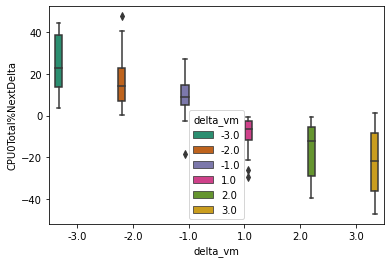

In [300]:
# Egy próba ennek a háromnak az ábrázolásására

# Bele kell füznöm a többi mérés adatát is (másik tessztek) és akkor jó lesz.

pn = an[['delta_vm', 'response_timeNextDelta', 'CPU0Total%NextDelta', '[NUMA:0]SlabNextDelta', '[TCPD]OutSegsNextDelta']]

# x tengelyen a delta vm

# plt.style.use('default')
# sns.set()
# sns.set_style('whitegrid')
# sns.set_palette('Set3')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# sns.boxplot(x='variable', y='value', data=pn, hue='species', palette='Dark2', ax=ax)
sns.boxplot(x='delta_vm', y='CPU0Total%NextDelta', hue='delta_vm', data=pn, palette='Dark2', ax=ax)

plt.show()

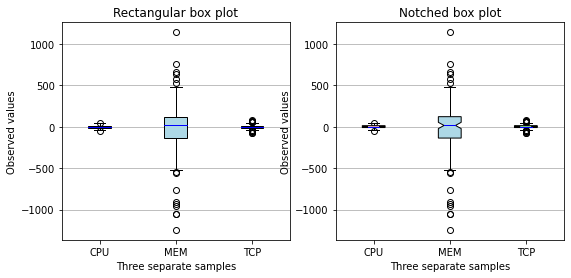

In [301]:
# Random test data
all_data = [np.random.normal(0, std, size=1) for std in range(1, 4)]
pn = an[['delta_vm', 'response_timeNextDelta', 'CPU0Total%NextDelta', '[NUMA:0]SlabNextDelta', '[TCPD]OutSegsNextDelta']]
all_data[0] = pn['CPU0Total%NextDelta'].values
all_data[1] = pn['[NUMA:0]SlabNextDelta']
all_data[2] = pn['[TCPD]OutSegsNextDelta']

labels = ['CPU', 'MEM', 'TCP']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[0].set_title('Rectangular box plot')

# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[1].set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

In [302]:
# Oké eddig jó

# lehet több változó alapján is aggregálni
an.groupby(['delta_vm', 'worker_number'])['CPU0Total%NextDelta'].mean()

delta_vm  worker_number
-3.0      4                41.06667
          5                35.60000
          6                15.20000
          8                12.70000
          9                10.00000
-2.0      3                26.94000
          4                25.70000
          5                18.90000
          6                11.50000
          7                11.60000
          8                 0.50000
          9                 6.13333
-1.0      2                17.41667
          3                11.36000
          4                 1.90000
          5                 9.20000
          6                 7.35000
          7                 2.46667
          8                 3.33333
          9                 1.80000
 1.0      1               -12.23333
          3               -29.30000
          4                -7.86667
          5                -4.50000
          6                -3.30000
          7                -6.90000
          8                -4.10000
 2.0

In [303]:
# Oké eddig jó

# Ilyet is lehet (avg, min, max, std)
aa = an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].mean()
bb = an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].min()
cc = an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].max()
dd = an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].std()
aa.columns = ['CPU0Total%mean', 'CPU0User%mean']
bb.columns = ['CPU0Total%min', 'CPU0User%min']
cc.columns = ['CPU0Total%max', 'CPU0User%max']
dd.columns = ['CPU0Total%std', 'CPU0User%std']

ff = pd.concat([aa, bb, cc, dd], axis=1)

ff.head()

,CPU0Total%mean,CPU0User%mean,CPU0Total%min,CPU0User%min,CPU0Total%max,CPU0User%max,CPU0Total%std,CPU0User%std
delta_vm,,,,,,,,
-3.0,25.25833,25.29167,3.5,3.3,44.3,47.8,14.39106,14.83629
-2.0,16.73636,16.70000,0.5,1.6,47.6,47.8,12.96830,13.11608
-1.0,9.06000,8.92000,-18.2,-16.3,27.3,28.0,9.83184,9.60178
1.0,-8.77895,-8.73684,-29.3,-29.1,-0.5,-0.8,8.62816,8.44546
2.0,-15.76000,-15.61200,-39.3,-39.0,-0.7,-0.7,12.76887,12.49261


In [304]:
an.groupby(['delta_vm']).agg({
    'CPU0Total%NextDelta': ['mean', 'min', 'max', 'std'],
    'CPU0User%NextDelta': ['mean', 'min', 'max', 'std']
})

CPU0Total%NextDelta                       CPU0User%NextDelta        \
                        mean   min   max       std               mean   min   
delta_vm                                                                      
-3.0                25.25833   3.5  44.3  14.39106           25.29167   3.3   
-2.0                16.73636   0.5  47.6  12.96830           16.70000   1.6   
-1.0                 9.06000 -18.2  27.3   9.83184            8.92000 -16.3   
 1.0                -8.77895 -29.3  -0.5   8.62816           -8.73684 -29.1   
 2.0               -15.76000 -39.3  -0.7  12.76887          -15.61200 -39.0   
 3.0               -21.81667 -47.1   1.4  15.96131          -21.95833 -46.8   

                          
           max       std  
delta_vm                  
-3.0      47.8  14.83629  
-2.0      47.8  13.11608  
-1.0      28.0   9.60178  
 1.0      -0.8   8.44546  
 2.0      -0.7  12.49261  
 3.0      -0.1  15.70185

In [305]:
#

#

# Itt tartok éppen

# Azon dolgozom, hogy a delta_metrika értékeket (delta_vm) fényében össze tudjam hasonlítani az egyes testek között

# Az egyes testek az egyes TestXX mappákban vannak

#

#

In [306]:
def cc(columnname: str):
    create_model_for_metric(columnname)
    create_model_for_metric_paraszt(columnname)

In [307]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [308]:
mf.columns.difference(mf.select_dtypes('float64').columns)

Index(['actual_vm_number_is', 'time', 'worker_give_metrics', 'worker_number',
       'write_to_csv_time'],
      dtype='object')

In [309]:
cn = mf.columns.difference(mf.select_dtypes('object').columns)

# interact(create_model_for_metric, columnname=cn);

interact(cc, columnname=cn);

interactive(children=(Dropdown(description='columnname', options=('CPU0Idle%', 'CPU0Total%', 'CPU0User%', '[DS…

In [310]:
# Fentiek alapján a következőek tűnnek jónak
g = ['[DSK:sda]Reads', '[DSK:sda]RKBytes', '[NUMA:0]Free', '[NUMA:0]Mapped', '[NUMA:0]Slab']

g = ['[DSK:sda]Reads', '[DSK:sda]RKBytes', '[NUMA:0]Free', '[NUMA:0]Mapped']

# Korábban peig azt láttam, hogy ezek vannak jó linearitásban a delta_vm-el
g = ['CPU0Total%', '[NUMA:0]Slab', '[TCPD]OutSegs'] + g

In [311]:
# Csak kiviből kipróbálom, hogy milyen érkeket adna az ő linreg beállításaikkal (nem tom melyik, melyik metric)

bvalues = [[1,0,0],
           [0.9448,0.1072,3.0954],
           [0.8954,0.3220,42.3307],
           [1.1008,0.4017,-20.2569],
           [1.0589,0.5713,1.5306],
           [0.6142,0.1733,26.5175],
           [0.9222,0.2059,1.1572],
           [0.7489,0.2851,18.4977]]

# metrics[i]=np.dot(bvalues[i],[(metrics[i]*w)/(w+k),(metrics[i]*k)/(w+k),1])

metrics = [90, 90, 90, 90, 90, 90]
w = 3
k = 1

m = 1

_cpu = np.dot(bvalues[m],[(metrics[m]*w)/(w+k),(metrics[m]*k)/(w+k),1])

print(_cpu)

# Mivel nem tudom, hogy melyik együtthatótk tartoznak a cpu-hoz ezért nem merem biztosan kijelenteni,
# de úgy tűnik, hogy náluk ha egy VM-t hozzáadok akkor csökken a CPU usage érték és nem nő.

# Ennek lehet az az oka is, hogy a Fibonacci CPU REST API-n tanítottam

69.2814


In [312]:

# Az a meglátásom, hogy vannak olyan metrikák amelyeknek a lineáris regressziós becslése katasztrófálisan szar.

# Ezért ezeket a változókat még véletlenül sem szabad bevennem a Neurális háló modellbe


In [313]:

# Csak úgy mondom, hogy gyárilag a Request Rate értéket is becsülni kell a linreg modellel

# Ennek az az oka, hogy mivel elosztott terhelés van, valóban előforudhat és elő is fordul,
# hogy ha egy új VM-t becsatolok a rendszerbe akkor az adott gépre kevesebb bejövő kérés
# fog jutni.


In [314]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')

# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [315]:

input_variables = ['request_rate',
                   'CPU0User%',
                   '[DSK:sda]Reads',
                   '[NUMA:0]Anon',
                   '[NUMA:0]AnonH']

input_variables = ['CPU1Idle%', 
                   'CPU1Total%', 
                   '[DSK:sda]Reads', 
                   '[DSK:sda]RMerge', 
                   '[DSK:sda]RKBytes', 
                   '[DSK:sda]WaitR', 
                   '[DSK:sda]Writes', 
                   '[DSK:sda]WMerge', 
                   '[DSK:sda]WaitW', 
                   '[DSK:sda]SvcTim']

input_variables = ['request_rate',
                   'CPU0User%',
                   '[DSK:sda]RKBytes',
                   '[DSK:sda]Writes',
                   '[DSK:sda]WaitW',
                   '[NUMA:0]AnonH']

input_variables = ['request_rate',
                   'CPU0User%',
                   '[DSK:sda]Reads',
                   '[DSK:sda]RMerge',
                   '[DSK:sda]RKBytes',
                   '[DSK:sda]WaitR',
                   '[DSK:sda]Writes',
                   '[DSK:sda]WMerge',
                   '[DSK:sda]WKBytes',
                   '[DSK:sda]WaitW',
                   '[DSK:sda]Request',
                   '[DSK:sda]QueLen',
                   '[DSK:sda]Wait',
                   '[DSK:sda]SvcTim',
                   '[DSK:sda]Util',
                   '[NUMA:0]Used',
                   '[NUMA:0]Free',
                   '[NUMA:0]Slab',
                   '[NUMA:0]Mapped',
                   '[NUMA:0]Anon',
                   '[NUMA:0]AnonH',
                   '[NUMA:0]Inactive',
                   '[NUMA:0]Hits',
                   '[TCPD]InReceives',
                   '[TCPD]InDelivers',
                   '[TCPD]OutRequests',
                   '[TCPD]InSegs',
                   '[TCPD]OutSegs']

input_variables = ['request_rate',
                   'CPU0User%',
                   '[DSK:sda]Reads',
                   '[DSK:sda]RMerge',
                   '[DSK:sda]RKBytes',
                   #'[DSK:sda]WaitR',
                   #'[DSK:sda]Writes',
                   #'[DSK:sda]WMerge',
                   #'[DSK:sda]WKBytes',
                   #'[DSK:sda]WaitW',
                   #'[DSK:sda]Request',
                   #'[DSK:sda]QueLen',
                   #'[DSK:sda]Wait',
                   #'[DSK:sda]SvcTim',
                   '[DSK:sda]Util',
                   '[NUMA:0]Used',
                   '[NUMA:0]Free',
                   #'[NUMA:0]Slab',
                   '[NUMA:0]Mapped',
                   '[NUMA:0]Anon',
                   #'[NUMA:0]AnonH',
                   '[NUMA:0]Inactive',
                   #'[NUMA:0]Hits',
                   '[TCPD]InReceives',
                   '[TCPD]InDelivers',
                   '[TCPD]OutRequests',
                   '[TCPD]InSegs',
                   '[TCPD]OutSegs']

# A kevesebb több (24.8%)
input_variables = ['request_rate',
                   'CPU0User%',
                   '[TCPD]OutSegs']

# Csak a jó linregesek (17.8%)
input_variables = ['request_rate',
                   'CPU0Idle%',
                   '[NUMA:0]Anon',
                   '[NUMA:0]Mapped',
                   '[NUMA:0]Inactive',
                   '[TCPD]InSegs',
                   '[TCPD]OutSegs']

# Fent -> hiába tökéletes a model az actionok után hülyeségeket mond

# A kevesebb több (24.8%)
input_variables = ['request_rate',
                   'CPU0User%',
                   '[TCPD]OutSegs']

# Fent -> még akkor is ha ez a model rosszabb becslést ad az actionok után sokkal jobb


# Amik a korábbi elemzések alapján szóba jöhet
input_variables = g



train_features = mf[input_variables]

# train_labels = mf[['response_time_p95']]

train_labels = mf[['response_time']]


normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(np.array(train_features))

with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())

first_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(15, activation='ReLU'),
    layers.Dense(units=1)
])

first_model.summary()

first_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


2023-05-10 15:58:20.911174: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-10 15:58:20.911280: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-10 15:58:20.911319: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lb): /proc/driver/nvidia/version does not exist
2023-05-10 15:58:20.912031: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[[   46.09 88445.81    48.63   103.67  3197.71 74804.25 38409.25]]
First example: [[    9.  89359.6     7.3    13.1   306.9 66139.2 61808. ]]
Normalized   : [[-1.41  0.78 -1.09 -1.45 -1.28 -1.02  3.48]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 7)                15        
 n)                                                              
                                                                 
 dense (Dense)               (None, 30)                240       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 736
Trainable params: 721
Non-trainab

In [316]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [RT]')
    plt.legend()
    plt.grid(True)

2023-05-10 15:58:48.985183: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-10 15:59:00.127132: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-10 15:59:00.166161: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-10 15:59:00.204395: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-10 15:59:07.435812: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


CPU times: user 55 s, sys: 2.09 s, total: 57.1 s
Wall time: 54.4 s


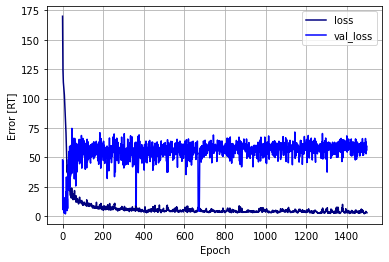

In [317]:
%%time
history = first_model.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    validation_split = 0.05)

plot_loss(history)

In [320]:
predicted_labels = first_model.predict(train_features)

5/5 [==============================] - 0s 3ms/step


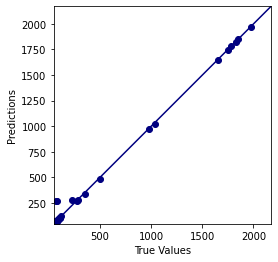

In [321]:
plot_true_vs_pred(train_labels.values, predicted_labels)

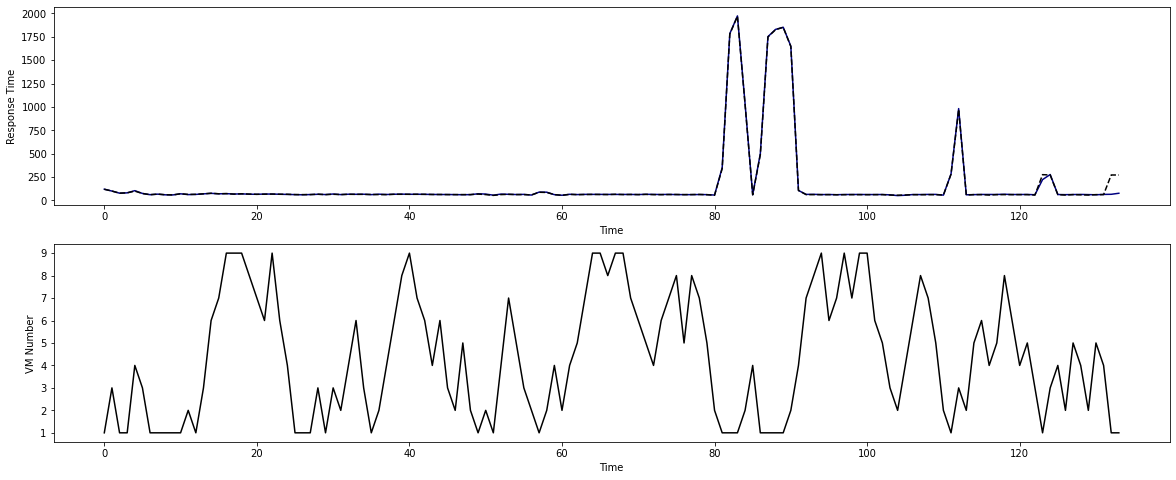

In [322]:
def plot_timeseries(train_labels, predicted_labels):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    ax1.plot(mf['response_time'], color = 'C0')
    # ax1.plot(mf['response_time_p95'], color = 'C1')
    
    # ax1.plot(train_labels, color = 'orange')
    ax1.plot(predicted_labels, color = 'black', ls = '--')

    # ax2 = ax1.twinx()

    # ax2.plot(mf['request_rate'], color = 'C2')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    # ax2.set_ylabel('Request Rate')

    ax3.plot(mf['worker_number'], color = 'black')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')

    plt.show()

plot_timeseries(train_labels.values, predicted_labels)

In [323]:
# Nem vagyok megelégedve az eredménnyel, mert:

# - a neurális háló nagyon érzékeny mindenre így nehéz összehasonlítanom az eredményeket.

# - nem sikerült még kiválasztanom a jó bemeneti változókat

# Hogy tovább tudjak lépni, most ezektől eltenkintek és elkészítem az a sub-routint ami kiszámolja a becslült
# válaszidőket az egyes fel-, leskálázási értékekehze.

In [324]:
print(input_variables)

['CPU0Total%', '[NUMA:0]Slab', '[TCPD]OutSegs', '[DSK:sda]Reads', '[DSK:sda]RKBytes', '[NUMA:0]Free', '[NUMA:0]Mapped']


In [327]:
# mindegyikhez elkészíteni hogy mi lenne a fel leskálázás utáni értéke

A = [i for i in range(-7, 8, 1)]

print(A)

# -2.
# inicalizálni egy üres dictianary-t a dict(action, predicted_response_time) pároknak
r = []
al = []
rl = []

# -1.
# kiválasztani, hogy milyen értéket mérek aktuális metrikákként
# ideiglenesen az mf utolsó értékei lesznek a bemenők

__N = 84

__current_response_time = mf['response_time_p95'].values[__N]
__last_metrics = mf[input_variables].values[__N]
__w = mf['worker_number'].values[__N]

print('-----------------------------------------')
print('__last_metrics -> vagyis a current values')
with np.printoptions(precision=2, suppress=True):
    print(__last_metrics)
print(colored('__current_rt -> \t' + str(__current_response_time), 'red'))
print(colored('__w -> worker_number \t' + str(__w), 'red'))

print('-----------------------------------------')

print(input_variables)
print('-----------------------------------------')

for a in A:
    
    # Ez kell, hogy a VM szám (w) ne legyen 0
    if __w + a != 0:
    
        # 0.
        # inicializálni egy üres tömböt az input_variable változónak
        _new_train_features = np.zeros((1, mf[input_variables].shape[1]))


        # 1.
        # minden metrikára kiszámolni
        for i, metric in enumerate(input_variables):
            # print(i, metric)
            if metric != 'worker_number':

                # 2.
                # megcsinálni a linreg modelt az adott metrikára (tanítás)
                __metric_term, __metric_next = create_term_for_metric(metric)
                __lr_model = calc_pred_for_metric(__metric_term.values, __metric_next.values)
                
                # 3.
                # elmenetni az adott modelt (amit nem használok sehol)
                # _ = joblib.dump(__lr_model, './lr/lr_' + metric + '.joblib', compress=9)
                
                # 3.
                # az előbbi model alapján egy becslés egy konkrét értékre (value, w, k)
                __metric_term = create_term_for_prediction(__last_metrics[i], __w, a)                
                # print('---a metrica értékének becsése (value, w, k alapján ---')
                # print(__metric_term)
                # print(metric)
                # print(a)
                # print('------------------')
                __pred_metric = __lr_model.predict(__metric_term)
                
                # 4.
                # adott becsült metrikát bele kell helyezni a neurális háló bemeneti változójához
                _new_train_features[0, i] = __pred_metric
                # print(_new_train_features)
            
                
        # 5.
        # megvan az új a-hoz tartozó metika tömb, ez alapján becsüjük meg a válaszidőt
        with np.printoptions(precision=2, suppress=True):
            print(_new_train_features)
        
        # 6.
        # a neurális háló model segítségével megbecsülöm a válaszidőt
        
        __predicted_response_time = first_model.predict(_new_train_features, verbose = 0)
        
        with np.printoptions(precision=2, suppress=True):
            print('action = ', a, ' --> rt --> ', __predicted_response_time, '\n')


[-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
-----------------------------------------
__last_metrics -> vagyis a current values
[   96.5 88154.8   138.4    87.5  2315.9 74253.6 35585.2]
__current_rt -> 	2665.0233500000004
__w -> worker_number 	2
-----------------------------------------
['CPU0Total%', '[NUMA:0]Slab', '[TCPD]OutSegs', '[DSK:sda]Reads', '[DSK:sda]RKBytes', '[NUMA:0]Free', '[NUMA:0]Mapped']
-----------------------------------------
[[   32.35 88003.45    23.36    96.72  2634.46 74350.92 35204.9 ]]
action =  -7  --> rt -->  [[48.12]] 

[[   28.54 87994.59    15.95    96.86  2638.86 74352.02 35166.79]]
action =  -6  --> rt -->  [[49.45]] 

[[   22.19 87979.83     3.62    97.09  2646.21 74353.85 35103.28]]
action =  -5  --> rt -->  [[57.61]] 

[[    9.49 87950.3    -21.06    97.55  2660.9  74357.52 34976.25]]
action =  -4  --> rt -->  [[72.59]] 

[[  -28.59 87861.71   -95.08    98.93  2704.97 74368.52 34595.17]]
action =  -3  --> rt -->  [[84.51]] 

[[  123.75 88216

In [326]:
from sklearn.linear_model import LinearRegression

def create_term_for_metric(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)

    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next

def create_term_for_prediction(value: float, w: int, k: int):
    
    __metric_term1 = value * w/(w+k)
    __metric_term2 = value * k/(w+k)
    
    __metric_term = np.array([[__metric_term1, __metric_term2]])
    
    return __metric_term

def calc_pred_for_metric(__metric_term, __metric_next):

    lr = LinearRegression(fit_intercept=True)

    rr = lr.fit(__metric_term, __metric_next)

    __fit_score = rr.score(__metric_term, __metric_next)
    __fit_coef_ = rr.coef_
    __fit_intercept_ = rr.intercept_
    
    __pred_metric = rr.predict(__metric_term)
    
    return rr
    
    

In [ ]:
# Az egy jó jel, hogyha nem változtatná a vm-ek számát vagyis a k=0, akkor a linreg becsés alapján
# adott új metrika érétkek
# és az ezek alapján adott becslése a válaszidőnek
# nagyon közel áll az éppen mért válaszidő értékéhez,
# ez egy nagyon jó jel, jele annak, hogy a két model jól működik

In [328]:
# A következő feladat

# Ha jól látom ez a Train10 könyvtár

# Tehát ebbe a könyvtárba megírni azt, hogy a feltanított modell alapján skálázzon,.

# És fontos az is, hogy ugyan itt legyen letárolva a terhelést végző jmx profil is,
# hogy ugyan az alapján tudjam terhelni ami alapján tanítottam.
# (egyezzenek a végpontok, stb.)

In [329]:
# Teendő 1

# Kiexportálni az itt feltanított model.

# Keras

first_model.save(os.getcwd())

# first_model.save('model.h5')


INFO:tensorflow:Assets written to: /home/ubuntu/Scaler/Train/Train14/assets


INFO:tensorflow:Assets written to: /home/ubuntu/Scaler/Train/Train14/assets


In [330]:

model = keras.models.load_model(os.getcwd())

# Let's check:
np.testing.assert_allclose(
    first_model.predict(_new_train_features), model.predict(_new_train_features)
)


1/1 [==============================] - 0s 86ms/step


In [331]:
# https://www.tensorflow.org/tutorials/keras/regression

In [383]:

def moric(__n, debug=False):
    'Az adatsorban minden elemre kiszámolja, hogy mi lett volna a válaszidő különböz k-mellett'
    
    results = []
    results_dict = []

    A = [i for i in range(-9, 10, 1)]

    # n-edik elem lesz kiválasztva a 'mf' dataframeből
    __N = __n

    __current_response_time = mf['response_time_p95'].values[__N]
    __last_metrics = mf[input_variables].values[__N]
    __w = mf['worker_number'].values[__N]
    
    if debug == True:
        print('RT = ', __current_response_time)
        print('w  = ', __w)
        with np.printoptions(precision=2, suppress=True):
            print(__last_metrics)

    for a in A:

        # Ez kell, hogy a VM szám (w) ne legyen 0
        if __w + a != 0:

            # 0.
            # inicializálni egy üres tömböt az input_variable változónak
            _new_train_features = np.zeros((1, mf[input_variables].shape[1]))

            # 1.
            # minden metrikára kiszámolni
            for i, metric in enumerate(input_variables):
                # print(i, metric)
                if metric != 'worker_number':

                    # 2.
                    # megcsinálni a linreg modelt az adott metrikára (tanítás)
                    __metric_term, __metric_next = create_term_for_metric(metric)
                    __lr_model = calc_pred_for_metric(__metric_term.values, __metric_next.values)

                    # 3.
                    # az előbbi model alapján egy becslés egy konkrét értékre (value, w, k)
                    __metric_term = create_term_for_prediction(__last_metrics[i], __w, a)                
                    __pred_metric = __lr_model.predict(__metric_term)

                    # 4.
                    # adott becsült metrikát bele kell helyezni a neurális háló bemeneti változójához
                    _new_train_features[0, i] = __pred_metric
                    # print(_new_train_features)

            # 5.
            # megvan az új a-hoz tartozó metika tömb, ez alapján becsüjük meg a válaszidőt
            if debug == True:
                with np.printoptions(precision=2, suppress=True):
                    print(_new_train_features)

            # 6.
            # a neurális háló model segítségével megbecsülöm a válaszidőt
            _ = time.time()
            __predicted_response_time = first_model.predict(_new_train_features, verbose = 0, batch_size=10, use_multiprocessing=True)
            # print(time.time()-_)
            
            # X.
            # megpróbálom felgyorsítani, hogy a numpy számoja a pred válaszidőt
            # W = first_model.get_weights()
            # __px = predict(_new_train_features)
            # print(__px, __predicted_response_time.flatten()[0])
            
            results_dict.append({'action': a, 'prt': __predicted_response_time.flatten()[0]})
            results.append(__predicted_response_time.flatten()[0])
            
    return results


In [372]:
len(mf)

134

In [348]:
a_prts = []
# for i in mf.shape[0]:
for i in track(range(len(mf))):
    _ = moric(i)
    a_prts.append(_)
    

Output()

2023-05-10 16:57:03.004009: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-10 16:57:43.415291: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-10 16:59:45.609294: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


In [357]:
len(a_prts)

134

In [358]:
# ha különböző hosszú ez a fos akkor baj van

a = set()

for i in range(len(a_prts)):
    a.add(len(a_prts[i]))

a

{18}

In [362]:
# Ha csak egy részét akarom az idősornak vizsgálni

a = np.array(a_prts[0:len(a_prts)])
print(a.shape)


a = np.array(a_prts[30:50])
print(a.shape)


(134, 18)
(20, 18)


In [363]:
# Ha csak bizonyos típusú actionoket akarok (pl. 0, 1, .., 5)

a = a[:,6:]
print(a.shape)

(20, 12)


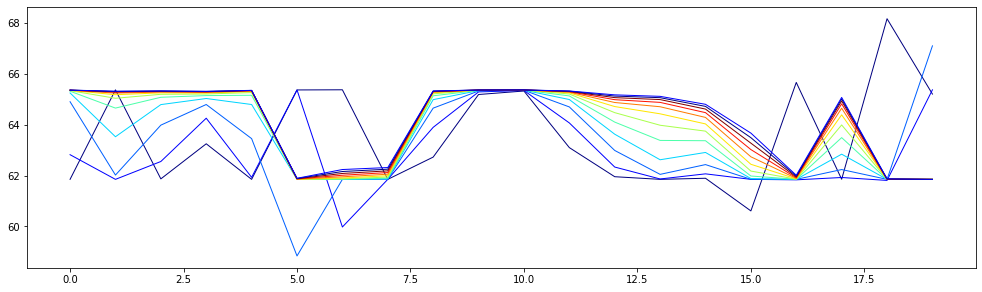

In [364]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 1
#mpl.rcParams['lines.linestyle'] = '-'
#mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

colormap = plt.get_cmap('jet')
colors = [colormap(k) for k in np.linspace(0, 1, 10)]

mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

plt.figure(figsize=(17, 4.8))
plt.plot(a)
plt.show()

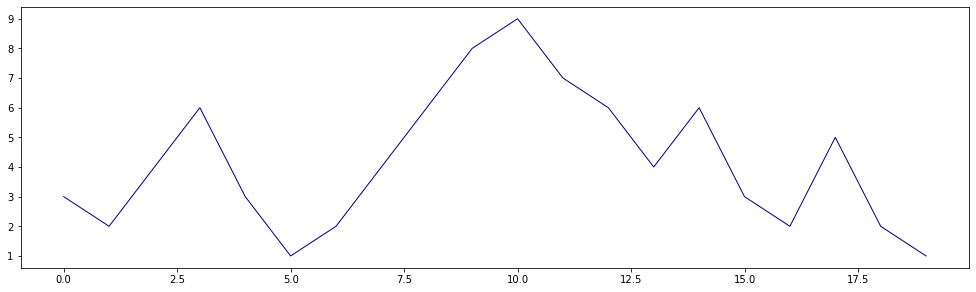

In [388]:
plt.figure(figsize=(17, 4.8))
plt.plot(mf['worker_number'].values[30:50])
plt.show()

In [384]:

# Amit egyszerűen nehezen tudok a mai agyammal felfogni, hogy van az, hogy vannak olyan pontok az idősorban
# amikor tök mindegy hány új vm-et adnék hozzá azt mondja hogy mindíg ugyan az lenne a várható válaszidő.

# Hogy a pékbe van ez?
# Mi miatt van ez így?
# A linreg nem teszi adott helyen a megfellő helyre az új metrika értéket?
# Vagy a neurális háló?

# A fenti est kitűnő példa erre.

# Például a 40-ik eset pont ilyen.

# ---> 

# Lehet, hogy ez olyan helyeken fordul elő, ahol a current worker number maximumon van.

moric(40)

moric(40, debug=True)

RT =  84.772
w  =  9
[   22.7 89664.4    16.2   158.3  4139.4 82171.2 37952. ]
[[   97.08 90303.59    88.15   127.74  3450.36 81052.05 40970.89]]
[[   56.76 89898.14    49.16   138.98  3804.83 81106.83 39141.96]]
[[   43.32 89762.98    36.17   142.72  3922.98 81125.09 38532.31]]
[[   36.61 89695.41    29.67   144.6   3982.06 81134.22 38227.49]]
[[   32.57 89654.86    25.77   145.72  4017.51 81139.69 38044.6 ]]
[[   29.89 89627.83    23.17   146.47  4041.14 81143.35 37922.67]]
[[   27.97 89608.52    21.31   147.    4058.02 81145.95 37835.58]]
[[   26.53 89594.04    19.92   147.4   4070.68 81147.91 37770.26]]
[[   25.41 89582.78    18.84   147.72  4080.52 81149.43 37719.45]]
[[   24.51 89573.77    17.97   147.97  4088.4  81150.65 37678.81]]
[[   23.78 89566.4     17.26   148.17  4094.84 81151.65 37645.56]]
[[   23.17 89560.26    16.67   148.34  4100.22 81152.48 37617.85]]
[[   22.65 89555.06    16.17   148.48  4104.76 81153.18 37594.4 ]]
[[   22.21 89550.6     15.74   148.61  4108.66 811

[85.76027,
 61.860844,
 62.080505,
 63.90139,
 65.03315,
 65.268074,
 65.328476,
 65.3494,
 65.35842,
 65.36295,
 65.36551,
 65.36708,
 65.36812,
 65.36885,
 65.369385,
 65.3698,
 65.37012,
 65.37038]